## Set up

#### Import Libraries

In [1]:
from utils.utils import *
from matplotlib import rcParams


In [2]:
# TO DO: check if lines 8-11 are needed 

RANDOM_SEED = 6
np.random.seed(RANDOM_SEED)

# torch.backends.cudnn.benchmark = False # uses deterministic convolution algorithm (may reduce performance)
# torch.backends.cudnn.deterministic = True #

#Sets the seed of RNG (GPU and CPU)
torch.manual_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

torch.cuda.manual_seed_all(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED) 

In [3]:
# Set settings
features, input_window, output_window, stride = set_settings()

print(f'features: {features}')
print(f'input_window: {input_window}')
print(f'output_window: {output_window}')
print(f'stride: {stride}')

features: ['Hips Flexion-Extension Left']
input_window: 100
output_window: 1
stride: 1


In [4]:
# Set device
print(f'The device used in this notebook is: {setDevice()}')

DEVICE = setDevice()

The device used in this notebook is: cuda


#### Load Data 

In [5]:
file_dir = r'D:\Study 2 Data\Healthy Gait\Train' 
# file_dir = r'D:\Study 2 Data\CP Gait\Train'
train_files = os.listdir(file_dir) 

# Changes the working directory to get the data from their location 
os.chdir(file_dir)
cwd = os.getcwd()

print(f'Current working directory is: {cwd}')
print(f"There are {len(train_files)} files in the specified path.")

Current working directory is: D:\Study 2 Data\Healthy Gait\Train
There are 7 files in the specified path.


In [6]:
train_files

['AB3154 BF T6-10.csv',
 'AB6751 BF T1-5.csv',
 'AB7422 BF T1-5.csv',
 'AB7779 BF T1-5.csv',
 'AB9119 BF T1-5.csv',
 'AB9737 BF T1-5.csv',
 'AB9737 BF T6-10.csv']

In [7]:
#Create feature list to extract values needed from CSV files
all_features = ['Trial', 'Time'] + features
all_features


['Trial', 'Time', 'Hips Flexion-Extension Left']

#### Extract Data from CSV into Pandas Dataframe

In [8]:
all_data = create_dataframe(train_files, all_features)

Extracting data from: AB3154 BF T6-10.csv
Extracting data from: AB6751 BF T1-5.csv
Extracting data from: AB7422 BF T1-5.csv
Extracting data from: AB7779 BF T1-5.csv
Extracting data from: AB9119 BF T1-5.csv
Extracting data from: AB9737 BF T1-5.csv
Extracting data from: AB9737 BF T6-10.csv


In [9]:
all_data.reset_index(drop=True, inplace=True) #reset the index of the table
# path = r'D:\Study 2 Data\Healthy Gait' + '\\' + 'all_data_healthy_train.csv'
# all_data.to_csv(path)

In [10]:
all_data

,Patient ID,Trial,Time,Hips Flexion-Extension Left
0,AB3154 BF T6-10,1,161.00,-1.76414
1,AB3154 BF T6-10,1,161.01,-1.71541
2,AB3154 BF T6-10,1,161.02,-1.66432
3,AB3154 BF T6-10,1,161.03,-1.60888
4,AB3154 BF T6-10,1,161.04,-1.54643
...,...,...,...,...
69453,AB9737 BF T6-10,14,474.70,5.59699
69454,AB9737 BF T6-10,14,474.71,5.45820
69455,AB9737 BF T6-10,14,474.72,5.31928
69456,AB9737 BF T6-10,14,474.73,5.17878


In [11]:
n_trials = all_data['Trial'].max()
print(f'maximum number of trials is: {n_trials}')

maximum number of trials is: 16


In [12]:
all_data['Patient ID'].unique()

array(['AB3154 BF T6-10', 'AB6751 BF T1-5', 'AB7422 BF T1-5',
       'AB7779 BF T1-5', 'AB9119 BF T1-5', 'AB9737 BF T1-5',
       'AB9737 BF T6-10'], dtype=object)

#### Divide into training and valation sets

In [13]:
# # Healthy Subjects # Original
# train_subjects = ['AB3154 BF T6-10', 
#                      'AB6751 BF T1-5', 
#                      'AB7779 BF T1-5',
#                      'AB9737 BF T1-5', 
#                      'AB9737 BF T6-10',
#                      'AB7422 BF T1-5',
#                      ]

# val_subjects = ['AB9119 BF T1-5']

In [14]:
# Healthy Subjects 
train_subjects = [
 'AB9737 BF T1-5', 
 'AB9737 BF T6-10', 
'AB3154 BF T6-10',
 'AB6751 BF T1-5', 
 'AB7779 BF T1-5', 
 'AB7422 BF T1-5']

val_subjects = ['AB9119 BF T1-5']

In [15]:
val_subjects

['AB9119 BF T1-5']

In [16]:
# # CP Subjects
# train_subjects = ['RP1677 V1 BF T1-5', 
#                     'RP1677 V2 BF T1-5', 
#                     'RP4774 V2 BF T1-2',
#                     'RP4774 V2 BF T3-7', 
#                     'RP4774 V2 BF T8-12', 
#                     'RP4907 V2 BF T1-5',
#                     'RP5498 V1 BF T1-2',
#                     'RP5498 V1 BF T3-5', 
#                     'RP7422 V1 BF T6-10', 
#                     'RP7422 V2 BF T1-5',
#                     'RP9534 V2 BF T1-5', 
#                     'RP9571 V1 BF T6-10', 
#                     'RP9571 V2 BF T4-8']

# val_subjects = ['RP6751 V1 BF T1-5',
#                     'RP6751 V2 BF T1-5',]

In [17]:
train_data = all_data.loc[all_data['Patient ID'].isin(train_subjects)]

val_data = all_data.loc[all_data['Patient ID'].isin(val_subjects)]

In [18]:
print(f'all_data: {all_data.shape}')
print(f'train_data: {train_data.shape}')
print(f'val_data: {val_data.shape}')

all_data: (69458, 4)
train_data: (61289, 4)
val_data: (8169, 4)


## Data Analysis

#### Data Analysis

In [19]:
all_data.isnull().sum()

Patient ID                     0
Trial                          0
Time                           0
Hips Flexion-Extension Left    0
dtype: int64

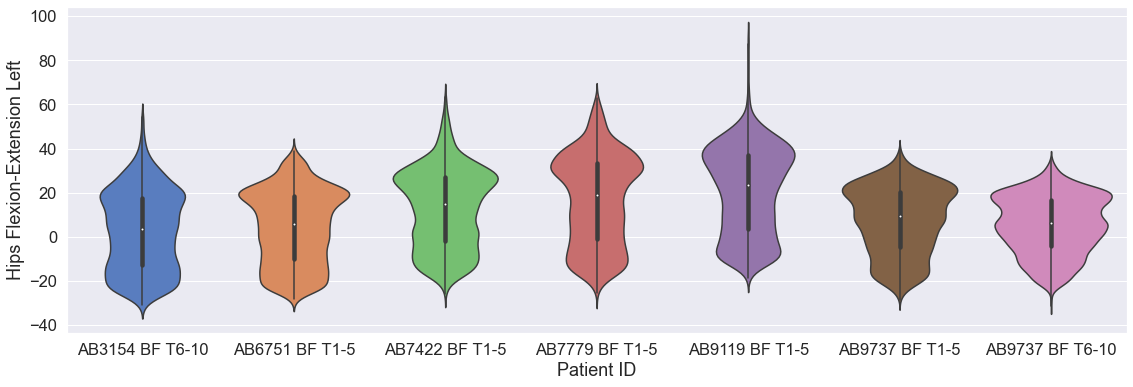

In [20]:
rcParams['figure.figsize'] = 19,6
sns.set(font_scale = 1.5)
ax = sns.violinplot(x="Patient ID", y="Hips Flexion-Extension Left", 
                    data=all_data, palette="muted")

In [21]:
# ax = sns.violinplot(x="Trial", y="Hips Flexion-Extension Right", 
#                     data=all_data[all_data['Patient ID'] == "AB3154 T6-10 BF"], palette="muted")

In [22]:
# ax = sns.violinplot(x="Trial", y="Hips Flexion-Extension Right", 
#                     data=all_data[all_data['Patient ID'] == "AB5498 BF T6-10"], palette="muted")

## Data Processing

In [23]:
train_samples = count_nsamples(train_data)
val_samples = count_nsamples(val_data)

For patient: AB3154 BF T6-10, trial: 1, there are: 651 time-points
For patient: AB3154 BF T6-10, trial: 2, there are: 541 time-points
For patient: AB3154 BF T6-10, trial: 3, there are: 613 time-points
For patient: AB3154 BF T6-10, trial: 4, there are: 601 time-points
For patient: AB3154 BF T6-10, trial: 5, there are: 711 time-points
For patient: AB3154 BF T6-10, trial: 6, there are: 651 time-points
For patient: AB3154 BF T6-10, trial: 7, there are: 1031 time-points
For patient: AB3154 BF T6-10, trial: 8, there are: 896 time-points
For patient: AB3154 BF T6-10, trial: 9, there are: 812 time-points
For patient: AB6751 BF T1-5, trial: 1, there are: 761 time-points
For patient: AB6751 BF T1-5, trial: 2, there are: 733 time-points
For patient: AB6751 BF T1-5, trial: 3, there are: 731 time-points
For patient: AB6751 BF T1-5, trial: 4, there are: 682 time-points
For patient: AB6751 BF T1-5, trial: 5, there are: 710 time-points
For patient: AB6751 BF T1-5, trial: 6, there are: 708 time-points


In [24]:
print(f'Number of train samples: {train_samples}')
print(f'Number of validation samples: {val_samples}')

Number of train samples: 69
Number of validation samples: 10


In [25]:
# os.makedirs('D:\Study 2 Data\Pre-process sample', exist_ok=True)  #check if directory exists
# all_data.to_csv('D:\Study 2 Data\Pre-process sample/exported-data3.csv')  #export data to csv

#### Convert Data into numpy array for forming windows

In [26]:
m = all_data['Patient ID'].unique()

In [27]:

def pd_to_np_converter(data, n_samples, features):
    #create a numpy array that stores the data for export
    sample_ID = []
    # patients = 2
    # n_trials = 10
    # # samples = patients * n_trials
    data_store = np.zeros((n_samples, 2000, len(features)), dtype=np.float32)
    i = 0

    for p in data['Patient ID'].unique(): #loop over patients 
        for t in data['Trial'].unique(): #loop over trials starting with trials 1 to trial 9 (inclusive)
            pd_array = data[(data['Patient ID'] == p) & (data['Trial'] == t)]
            if pd_array.empty:
                continue
                # print('DataFrame is empty!')
                # print(f'Trail {t} does not exist in {p}')
            else:
                np_array = pd_array.to_numpy()
                data_store[i, :np_array.shape[0], :] = np_array[:,3:] 
                sample_ID.append(p+ ' Ts'+str(t)) 
                i +=1

    return pd_array.columns, data_store


In [28]:
train_columns, train_data_np = pd_to_np_converter(train_data, train_samples, features)
val_columns, val_data_np = pd_to_np_converter(val_data, val_samples, features)

print(f'train_data_np.shape: {train_data_np.shape}')
print(f'val_data_np.shape: {val_data_np.shape}')

train_data_np.shape: (69, 2000, 1)
val_data_np.shape: (10, 2000, 1)


In [29]:
train_columns[3:].tolist() 

['Hips Flexion-Extension Left']

In [30]:
features == train_columns[3:].tolist() 

True

In [31]:
labels_keys = train_columns[3:].tolist() #copy the train columns removing the first column headers'Patient ID', 'Trial', 'Time'


if features == labels_keys: # check that the features are the same as the label keys 
    print('YAY! Column headers of dataframe match features')
else:
    print('ERROR: Features and labels_keys do not match!')

YAY! Column headers of dataframe match features


#### Generate Dictionary for Features

In [32]:
labels_keys = features 

labels_idx = np.arange(0, len(labels_keys), 1)

labels = dict(zip(labels_keys, labels_idx))

len(labels)
labels
# labels_keys

{'Hips Flexion-Extension Left': 0}

#### Process Data: Window Generation

In [33]:
def window_generator_fltrd(sequence, input_window, output_window, stride, features, labels):
    """
    Trims the input sequence from leading and trailing zeros, then generates an array with input windows and another array for the corresponding output windows
    Args:
        sequence: (np.array, float32) columns are features while rows are time points
        features: (list, strin~g) column names
        input_window: (int)
        stride (int): the value the input window shifts along the sequence 
    Returns:

    """
    # shortest_seqLen = float('inf')

    # f_zeros = [] #array that stores the number of leading zeros for each feature
    b_zeros = [] #array that stores the number of trailing zeros for each feacture 

    for f in features:
        # trim the leading and training zeros
        # f_zeros.append(sequence[:,labels[f]].shape[0] - np.trim_zeros(sequence[:,labels[f]], 'f').shape[0]) #forward zeros
        b_zeros.append(sequence[:,labels[f]].shape[0] - np.trim_zeros(sequence[:,labels[f]], 'b').shape[0]) #backward zeros

    # max_f_zeros = max(f_zeros) #find the maximum number of leading zeros
    max_b_zeros = max(b_zeros) #find the maximum number of trailing/backward zeros 
    # print(max_b_zeros)

    #total sequence length minus max leading and trailing zeros 
    trimmed_seqLen = sequence[:,0].shape[0] - (max_b_zeros)
    trimmed_seqLen_reduced = trimmed_seqLen - 200 #reducing sequence size to remove the first and last 200 timesteps which may contain errors   
    print(f'trimmed_seqLen: {trimmed_seqLen}')
    print(f'trimmed_seqLen_reduced: {trimmed_seqLen_reduced}')


    # Slides are the number of times the input window can scan the sequence 
    # Using the equation that calculates the number of outputs as in convolution  (W – F + 2P) / S + 1, W=input image width, F=filter width, P=padding, S=stride
    # The width of the image is taken as the number of time steps in the sequence, corresponding to the length of any TRIMMED column in the data 
    slides = ((trimmed_seqLen_reduced - (input_window+output_window)) // stride) + 1
    print(f"number of slides is: {slides}")

    # Calculating the first index of each of the output sequences (first index always f_zeros as its always shifted to start with the first non-zero element)
    seq_indicies = (np.arange(slides) * stride) + 100

    if slides <= 0:
        raise ValueError("input window and output window length are greater than sequence length, check their values")

    # Creates an zero numpy array to store the samples in 
    X_values = np.zeros((len(seq_indicies) , input_window, len(features)))
    Y_values = np.zeros((len(seq_indicies), output_window, len(features)))

    # Loop through the features, then loop through the list of sequence indicies needed for input and output windows 
    for j, feature in enumerate(features):
        # print(j)
        # print(feature)
        for i, idx in enumerate(seq_indicies):
            X_values[i, :, j] = sequence[idx:idx+input_window, labels[feature]]
            Y_values[i, :, j] = sequence[idx+input_window:idx+input_window + output_window, labels[feature]]

    return X_values, Y_values 

In [34]:
def window_generator_lt_fltrd(sequence, input_window, future_window, stride, features, labels): #window gernerator long term fltrd (creats a validation window up to 200 timesteps in advance to measure error on long term future predictions)
    """
    Trims the input sequence from leading and trailing zeros, then generates an array with input windows and another array for the corresponding output windows
    Args:
        sequence: (np.array, float32) columns are features while rows are time points
        features: (list, strin~g) column names
        input_window: (int)
        stride (int): the value the input window shifts along the sequence 
    Returns:

    """
    b_zeros = [] #array that stores the number of trailing zeros for each feacture 

    for f in features:
        # trim the leading and training zeros
        b_zeros.append(sequence[:,labels[f]].shape[0] - np.trim_zeros(sequence[:,labels[f]], 'b').shape[0]) #backward zeros

    max_b_zeros = max(b_zeros) #find the maximum number of trailing/backward zeros 
    # print(max_b_zeros)

    fltrd_samples = 2 * 100 #remove 150 timesteps from the beggining and ending of the entire sequence
    # lt_len = 200 # number of timesteps to predict in the future based on a single input window (to be used in measuring errors based on prediction input)
    
    #total sequence length minus max leading and trailing zeros 
    trimmed_seqLen = sequence[:,0].shape[0] - (max_b_zeros)
    trimmed_seqLen_reduced = trimmed_seqLen - (fltrd_samples) # (- fltrd_samples is done to reduce sequence size to remove the first and last 150 timesteps which may contain errors since they corresponding to beggining and ending of the trials 
    print(f'trimmed_seqLen: {trimmed_seqLen}')
    print(f'trimmed_seqLen_reduced: {trimmed_seqLen_reduced}')


    # Slides are the number of times the input window can scan the sequence 
    # Using the equation that calculates the number of outputs as in convolution  (W – F + 2P) / S + 1, W=input image width, F=filter width, P=padding, S=stride
    # The width of the image is taken as the number of time steps in the sequence, corresponding to the length of any TRIMMED column in the data 
    slides = ((trimmed_seqLen_reduced - (input_window+future_window)) // stride) + 1
    print(f"number of slides is: {slides}")

    # Calculating the first index of each of the output sequences (first index always f_zeros as its always shifted to start with the first non-zero element)
    seq_indicies = (np.arange(slides) * stride) + 100

    if slides <= 0:
        raise ValueError("input window and output window length are greater than sequence length, check their values")

    # Creates an zero numpy array to store the samples in 
    X_values = np.zeros((len(seq_indicies) , input_window, len(features)))
    Y_values = np.zeros((len(seq_indicies), future_window, len(features)))

    # Loop through the features, then loop through the list of sequence indicies needed for input and output windows 
    for j, feature in enumerate(features):
        # print(j)
        # print(feature)
        for i, idx in enumerate(seq_indicies):
            X_values[i, :, j] = sequence[idx:idx+input_window, labels[feature]]
            Y_values[i, :, j] = sequence[idx+input_window:idx+input_window + future_window, labels[feature]]

    return X_values, Y_values 

In [35]:
# Creating training datasets
# Selecting the features to be used when creating windows 
approx_seq_len = 2000 # appoximate the length of the longest sequence that can be encountered 
# samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
samples_per_file = 900


# create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
X_train_windows = np.zeros((samples_per_file*train_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
Y_train_windows = np.zeros((samples_per_file*train_samples, output_window, len(features)), dtype=np.float32) 


start_idx = 0 #setting start index to equal zero 
train_sample_sum = 0
train_excluded_samples = []
# Create training windows 

#for i in tqdm(range(train_size)): #Use for including all data including outliers 
for i in range(train_samples): 
       
    X_values, Y_values = window_generator_fltrd(
        train_data_np[i,:,:],
        input_window=input_window, 
        output_window=output_window, 
        stride=stride, 
        features=features,
        labels=labels
        )

    end_idx = start_idx + X_values.shape[0]

    # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

    X_train_windows[start_idx:end_idx, :, :] = X_values
    Y_train_windows[start_idx:end_idx, :, :] = Y_values

    # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

    start_idx = end_idx 
    train_sample_sum += X_values.shape[0]

    # except Exception:
    #     exception_msg(i)
    #     train_excluded_samples.append(i)

# print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
X_train_data = X_train_windows[:end_idx, :, :]
Y_train_data = Y_train_windows[:end_idx, :, :]


print(f'shape of X_train_windows: {X_train_windows.shape}')
print(f'shape of Y_train_windows: {Y_train_windows.shape}')

print(f'shape of X_train_data: {X_train_data.shape}')
print(f'shape of Y_train_data: {Y_train_data.shape}')

trimmed_seqLen: 651
trimmed_seqLen_reduced: 451
number of slides is: 351
trimmed_seqLen: 541
trimmed_seqLen_reduced: 341
number of slides is: 241
trimmed_seqLen: 613
trimmed_seqLen_reduced: 413
number of slides is: 313
trimmed_seqLen: 601
trimmed_seqLen_reduced: 401
number of slides is: 301
trimmed_seqLen: 711
trimmed_seqLen_reduced: 511
number of slides is: 411
trimmed_seqLen: 651
trimmed_seqLen_reduced: 451
number of slides is: 351
trimmed_seqLen: 1031
trimmed_seqLen_reduced: 831
number of slides is: 731
trimmed_seqLen: 896
trimmed_seqLen_reduced: 696
number of slides is: 596
trimmed_seqLen: 812
trimmed_seqLen_reduced: 612
number of slides is: 512
trimmed_seqLen: 761
trimmed_seqLen_reduced: 561
number of slides is: 461
trimmed_seqLen: 733
trimmed_seqLen_reduced: 533
number of slides is: 433
trimmed_seqLen: 731
trimmed_seqLen_reduced: 531
number of slides is: 431
trimmed_seqLen: 682
trimmed_seqLen_reduced: 482
number of slides is: 382
trimmed_seqLen: 710
trimmed_seqLen_reduced: 510
nu

In [36]:
# Creating validation datasets
# Selecting the features to be used when creating windows 
approx_seq_len = 2000 # appoximate the length of the longest sequence that can be encountered 
# samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
samples_per_file = 1600


# create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
X_val_windows = np.zeros((samples_per_file*val_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
Y_val_windows = np.zeros((samples_per_file*val_samples, output_window, len(features)), dtype=np.float32) 


start_idx = 0 #setting start index to equal zero 
val_sample_sum = 0
val_excluded_samples = []
# Create training windows 

#for i in tqdm(range(train_size)): #Use for including all data including outliers 
for i in range(val_samples): 
       
    X_values, Y_values = window_generator_fltrd(
        val_data_np[i,:,:],
        input_window=input_window, 
        output_window=output_window, 
        stride=stride, 
        features=features,
        labels=labels
        )

    end_idx = start_idx + X_values.shape[0]

    # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

    X_val_windows[start_idx:end_idx, :, :] = X_values
    Y_val_windows[start_idx:end_idx, :, :] = Y_values

    # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

    start_idx = end_idx 
    val_sample_sum += X_values.shape[0]

    # except Exception:
    #     exception_msg(i)
    #     train_excluded_samples.append(i)

# print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
X_val_data = X_val_windows[:end_idx, :, :]
Y_val_data = Y_val_windows[:end_idx, :, :]


print(f'shape of X_val_windows: {X_val_windows.shape}')
print(f'shape of Y_val_windows: {Y_val_windows.shape}')

print(f'shape of X_val_data: {X_val_data.shape}')
print(f'shape of Y_val_data: {Y_val_data.shape}')

trimmed_seqLen: 890
trimmed_seqLen_reduced: 690
number of slides is: 590
trimmed_seqLen: 1001
trimmed_seqLen_reduced: 801
number of slides is: 701
trimmed_seqLen: 831
trimmed_seqLen_reduced: 631
number of slides is: 531
trimmed_seqLen: 1051
trimmed_seqLen_reduced: 851
number of slides is: 751
trimmed_seqLen: 736
trimmed_seqLen_reduced: 536
number of slides is: 436
trimmed_seqLen: 766
trimmed_seqLen_reduced: 566
number of slides is: 466
trimmed_seqLen: 664
trimmed_seqLen_reduced: 464
number of slides is: 364
trimmed_seqLen: 764
trimmed_seqLen_reduced: 564
number of slides is: 464
trimmed_seqLen: 711
trimmed_seqLen_reduced: 511
number of slides is: 411
trimmed_seqLen: 755
trimmed_seqLen_reduced: 555
number of slides is: 455
shape of X_val_windows: (16000, 100, 1)
shape of Y_val_windows: (16000, 1, 1)
shape of X_val_data: (5169, 100, 1)
shape of Y_val_data: (5169, 1, 1)


In [37]:
# Creating validation datasets (long term predictions)
# Selecting the features to be used when creating windows 
approx_seq_len = 2000 # appoximate the length of the longest sequence that can be encountered 
# samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
samples_per_file = 1600

future_window = 200

# create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
X_val_lt_windows = np.zeros((samples_per_file*val_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
Y_val_lt_windows = np.zeros((samples_per_file*val_samples, future_window, len(features)), dtype=np.float32) 


start_idx = 0 #setting start index to equal zero 
val_lt_sample_sum = 0
val_lt_excluded_samples = []
# Create training windows 

#for i in tqdm(range(train_size)): #Use for including all data including outliers 
for i in range(val_samples): 
       
    X_values, Y_values = window_generator_lt_fltrd(
        val_data_np[i,:,:],
        input_window=input_window, 
        future_window=future_window, 
        stride=stride, 
        features=features,
        labels=labels
        )

    end_idx = start_idx + X_values.shape[0]

    # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

    X_val_lt_windows[start_idx:end_idx, :, :] = X_values
    Y_val_lt_windows[start_idx:end_idx, :, :] = Y_values

    # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

    start_idx = end_idx 
    val_lt_sample_sum += X_values.shape[0]

    # except Exception:
    #     exception_msg(i)
    #     train_excluded_samples.append(i)

# print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
X_val_lt_data = X_val_lt_windows[:end_idx, :, :]
Y_val_lt_data = Y_val_lt_windows[:end_idx, :, :]


print(f'shape of X_val_lt_windows: {X_val_lt_windows.shape}')
print(f'shape of Y_val_lt_windows: {Y_val_lt_windows.shape}')

print(f'shape of X_val_lt_data: {X_val_lt_data.shape}')
print(f'shape of Y_val_lt_data: {Y_val_lt_data.shape}')

trimmed_seqLen: 890
trimmed_seqLen_reduced: 690
number of slides is: 391
trimmed_seqLen: 1001
trimmed_seqLen_reduced: 801
number of slides is: 502
trimmed_seqLen: 831
trimmed_seqLen_reduced: 631
number of slides is: 332
trimmed_seqLen: 1051
trimmed_seqLen_reduced: 851
number of slides is: 552
trimmed_seqLen: 736
trimmed_seqLen_reduced: 536
number of slides is: 237
trimmed_seqLen: 766
trimmed_seqLen_reduced: 566
number of slides is: 267
trimmed_seqLen: 664
trimmed_seqLen_reduced: 464
number of slides is: 165
trimmed_seqLen: 764
trimmed_seqLen_reduced: 564
number of slides is: 265
trimmed_seqLen: 711
trimmed_seqLen_reduced: 511
number of slides is: 212
trimmed_seqLen: 755
trimmed_seqLen_reduced: 555
number of slides is: 256
shape of X_val_lt_windows: (16000, 100, 1)
shape of Y_val_lt_windows: (16000, 200, 1)
shape of X_val_lt_data: (3179, 100, 1)
shape of Y_val_lt_data: (3179, 200, 1)


In [38]:
#checking the windows
x1 = np.arange(0,100)
x2 = np.arange(100,300)
x3 = 100
plt.plot(x1, X_val_lt_data[2,:,1], label='input')
plt.plot(x2, Y_val_lt_data[2,:,1], label='200 timesteps in the future')
plt.scatter(x3, Y_val_data[2,:,1], s=30, label='target value', color='g')
plt.legend()


IndexError: index 1 is out of bounds for axis 2 with size 1

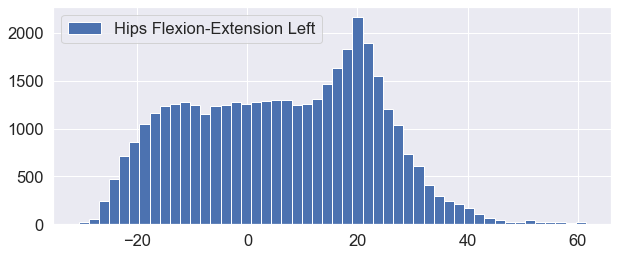

In [39]:
# Plot histogram of the data 
rcParams['figure.figsize'] = 10,4

for f in range(len(features)):
    plt.hist(Y_train_data[:,:,f].reshape(-1,1), label = features[f], bins=50, range=(Y_train_data.min(), Y_train_data.max()))
    plt.legend()
    plt.show()

#### Process Data: Normalisation/Standarisation

In [40]:
X_train_norm, scalars = normalise_fit(X_train_data)
Y_train_norm = normalise_transform(Y_train_data, scalars)

X_val_norm = normalise_transform(X_val_data, scalars)
Y_val_norm = normalise_transform(Y_val_data, scalars)

X_val_lt_norm = normalise_transform(X_val_lt_data, scalars)
Y_val_lt_norm = normalise_transform(Y_val_lt_data, scalars)


scalars

array([[-30.96504974],
       [ 63.01054001]])

In [41]:
# #Use the data unnormalised 
# X_train_norm = X_train_data
# Y_train_norm = Y_train_data


# X_val_norm = X_val_data
# Y_val_norm = Y_val_data

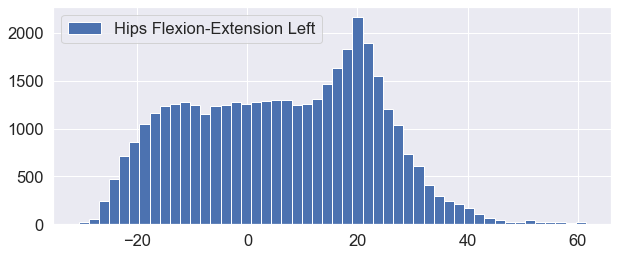

In [42]:
# Plot histogram of the data 

rcParams['figure.figsize'] = 10,4

for f in range(len(features)):
    plt.hist(Y_train_data[:,:,f].reshape(-1,1), bins=50, label = features[f])
    plt.legend()
    plt.show()

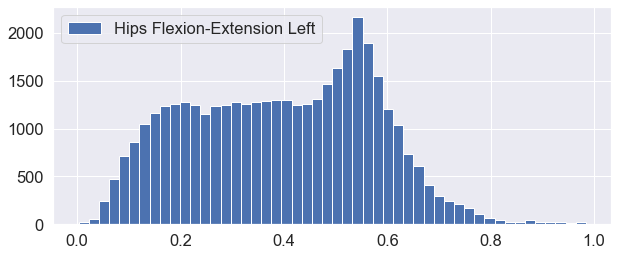

In [43]:
# Plot histogram of the data 

rcParams['figure.figsize'] = 10,4

for f in range(len(features)):
    plt.hist(Y_train_norm[:,:,f].reshape(-1,1), bins=50, label = features[f])
    plt.legend()
    plt.show()

In [44]:
# Convert to Tensor 
# do not store on GPU (yet)
X_train = torch.from_numpy(X_train_norm).to(torch.float64)
Y_train = torch.from_numpy(Y_train_norm).to(torch.float64)

# X_val = torch.from_numpy(X_val_norm).float()

# X_val_resized = np.expand_dims(Y_val_norm[:,0,:], axis=1)
# Y_val = torch.from_numpy(X_val_resized).float()

X_val = torch.from_numpy(X_val_norm).to(torch.float64)
Y_val = torch.from_numpy(Y_val_norm).to(torch.float64)


X_val_lt = torch.from_numpy(X_val_lt_norm).to(torch.float64)
Y_val_lt = torch.from_numpy(Y_val_lt_norm).to(torch.float64)


print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')

print(f'X_val shape: {X_val.shape}')
print(f'Y_val shape: {Y_val.shape}')

print(f'X_val_lt shape: {X_val_lt.shape}') #long term predictions
print(f'Y_val_lt shape: {Y_val_lt.shape}') #long term predictions




X_train shape: torch.Size([40589, 100, 1])
Y_train shape: torch.Size([40589, 1, 1])
X_val shape: torch.Size([5169, 100, 1])
Y_val shape: torch.Size([5169, 1, 1])
X_val_lt shape: torch.Size([3179, 100, 1])
Y_val_lt shape: torch.Size([3179, 200, 1])


In [45]:
# # Convert to Tensor 
# # do not store on GPU (yet)
# X_train = torch.from_numpy(X_train_norm).float()
# Y_train = torch.from_numpy(Y_train_norm).float()

# # X_val = torch.from_numpy(X_val_norm).float()

# # X_val_resized = np.expand_dims(Y_val_norm[:,0,:], axis=1)
# # Y_val = torch.from_numpy(X_val_resized).float()

# X_val = torch.from_numpy(X_val_norm).float()
# Y_val = torch.from_numpy(Y_val_norm).float()


# X_val_lt = torch.from_numpy(X_val_lt_norm).float()
# Y_val_lt = torch.from_numpy(Y_val_lt_norm).float()


# print(f'X_train shape: {X_train.shape}')
# print(f'Y_train shape: {Y_train.shape}')

# print(f'X_val shape: {X_val.shape}')
# print(f'Y_val shape: {Y_val.shape}')

# print(f'X_val_lt shape: {X_val_lt.shape}') #long term predictions
# print(f'Y_val_lt shape: {Y_val_lt.shape}') #long term predictions




In [46]:
# # Convert to Tensor & ROUND
# # do not store on GPU (yet)
# X_train = torch.from_numpy(np.round(X_train_norm,2)).float()
# Y_train = torch.from_numpy(np.round(Y_train_norm)).float()

# X_val = torch.from_numpy(np.round(X_val_norm)).float()
# Y_val = torch.from_numpy(np.round(Y_val_norm)).float()

# print(f'X_train shape: {X_train.shape}')
# print(f'Y_train shape: {Y_train.shape}')

# print(f'X_val shape: {X_val.shape}')
# print(f'Y_val shape: {Y_val.shape}')


# X_train[1,:,1]

In [47]:
# #only use for predicting a single feautre
# Y_train = Y_train[:,:,1].unsqueeze(-1)
# Y_val = Y_val[:,:,1].unsqueeze(-1)

# print(f'Y_train shape: {Y_train.shape}')

# print(f'Y_val shape: {Y_val.shape}')

In [48]:
# output_window=1
# features = ['Knees Flexion-Extension Left']

In [49]:
train_dataset = gaitDataset(X_train, Y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle = True)
# train_dataloader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle = False)

val_dataset = gaitDataset(X_val, Y_val) #ADJUSTED
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)
# val_dataloader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False)



val_lt_dataset = gaitDataset(X_val_lt, Y_val_lt) #long term predictions
val_lt_dataloader = DataLoader(val_lt_dataset, batch_size=len(val_lt_dataset), shuffle=False)


print(f"Train Dataset length: {len(train_dataset)}")
print(f"Val Dataset length: {len(val_dataset)}")
print(f"Val_lt Dataset length: {len(val_lt_dataset)}")


Train Dataset length: 40589
Val Dataset length: 5169
Val_lt Dataset length: 3179


In [50]:
len(train_dataset)

40589

#### Import Scalars for healthy and CP gait 

In [51]:
scalars

array([[-30.96504974],
       [ 63.01054001]])

In [52]:
# #Export scalars for healthy gait 
# import pickle

# fname = r'D:\Study 2 Data\Healthy Gait' + '\\' + 'healthy_scalars.pickle'

# # healthy_scalars = scalars.copy()

# #export scalars as pickle file 
# # with open(fname, 'wb') as handle:
# #     pickle.dump(healthy_scalars, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # Import pickle file
# with open(fname, 'rb') as handle:
#     healthy_scalars = pickle.load(handle)


In [53]:
# #Export scalars for CP gait 
# import pickle

# fname = r'D:\Study 2 Data\CP Gait' + '\\' + 'cp_scalars.pickle'

# # cp_scalars = scalars.copy()

# # #export scalars as pickle file 
# # with open(fname, 'wb') as handle:
# #     pickle.dump(cp_scalars, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # # Import pickle file
# with open(fname, 'rb') as handle:
#     cp_scalars = pickle.load(handle)


## Hyperparameter Optimisation

In [ ]:
# # useful resources: https://www.youtube.com/watch?v=8A6TEjG2DNw (LSTM Time Series Prediction Tutorial using PyTorch in Python | Coronavirus Daily Cases Forecasting)
# LSTM model 
class LSTM(nn.Module):
    def __init__(self, input_size, in_seq_len, out_seq_len, output_size, params, device):
        super(LSTM, self).__init__()
        '''
        nn.lstm: 
        input_size = number of features in input, if batch_first = TRUE (batchSize, seq_len, Hin) FEATURES
        hidden_size = number of features in hidden state
        num_layers
        batch_first = if TRUE (batch, seq, Hin) Hin may mean input features
        h_0 = (D * num_layers, batchSize, Hout)
        c_0 = (D * num_layers, batchSize, Hcell)

        output = (batchSize, seq_len, D * Hout) Hout may mean output features, if batch first = TRUE 
        h_0 = (D*num_layers, N, Hout) final state for each element in the batch 
        C_0 = (D*num_layers, N, Hcell) final cell state for each element 

        nn.linear:
        input_size = (N,*, Hin) Hin = input_features (equal to hidden size therefore is arbitrarily set)
        output_size = (N, *, Hout) Hout = output features (equal to output_size passed in to the model) 

        '''
        # Pytorch documentation: 
        # >>> rnn = nn.LSTM(10, 20, 2) features, hidden_size, number of layers 
        # >>> input = torch.randn(5, 3, 10) in_seq_len, batch_size, hidden_size (batch size should not be input to the mode, inferred from the shape of the input and will be the first number if batch_first = TRUE)
        # >>> h0 = torch.randn(2, 3, 20)
        # >>> c0 = torch.randn(2, 3, 20)
        # >>> output, (hn, cn) = rnn(input, (h0, c0))

        self.input_size = input_size
        self.hidden_size = params['hidden_size']
        self.num_layers = params['num_layers']
        self.in_seq_len = in_seq_len
        self.output_size = output_size
        self.out_seq_len = out_seq_len
        self.device = device
        
        # nn.LSTM(features, hidden_size, number of layers)
        self.lstm = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=self.num_layers, batch_first = True)

        #nn.fc1
        self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=(self.output_size * self.out_seq_len))
        # self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=(self.output_size * self.out_seq_len))


    def forward(self, input_data):

        # initialise hidden and cell states after passing through each batch (this is skipped in stateless model)
        h_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device) # input_data.shape[0] is equal to batch size
        c_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device)

        #propagate through LSTM
        lstm_out, (h_out, c_out) = self.lstm(input_data, (h_0, c_0))
        # lsmt_out.shape = (batch_size,seq_length, hidden_size)
        # print('lstm_out[-1][-1]')
        # print(lstm_out[-1][-1])

        # print('h_out[-1][-1]')
        # print(h_out[-1][-1])
        # if lstm_out[-1][-1] == h_out[-1][-1]:
        #     print(lstm_out[-1][-1])
            
        # print(f'lsmt_out: {lstm_out.shape}')
        # print(f'h_out: {h_out.shape}')
        # print(f'h_out: {h_out.shape}')

        # propagate through linear layer 
        fc1_out = self.fc1(h_out[-1])
        # fc1_out = self.fc1(lstm_out)
        # print(f'preds.shape (before reshaping): {fc1_out.shape}')
        
        preds = fc1_out.reshape(input_data.shape[0], self.out_seq_len, self.output_size)
        # print(f'preds.shape (after reshaping): {preds.shape}')
        
        return preds

In [ ]:
global trial_number
trial_number = 0
trial_descrbn = 'LSTM CP'

In [ ]:
def train_LSTM(model, train_dataloader, val_dataloader, num_epochs, params, device):
    global trial_number
    
    MODEL_PATH= r'D:\Study 2 Results and Models\Study 2 Optimisation\2022-07-10 Optimisation LSTM CP 2 (out 1)' + '\\'  + str(trial_descrbn) + '-' + str(date.today()) + '-' + 'trial' + str(trial_number) + '.pt'
    loss_function = nn.MSELoss(reduction='mean')
    optimiser = torch.optim.Adam(model.parameters(), lr = params['learning_rate'])

    # train_loss, val_loss = np.zeros(num_epochs), np.zeros(num_epochs)
    # num_epochs=params['num_epochs']
    train_loss = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    
    min_val_loss = 1.
    
    for epoch in range(num_epochs):
        # Loop over batch values 
        runningLoss_train = 0. 

        for idx, (batch_inputs, batch_targets) in enumerate(train_dataloader):
            
            # Save batch on GPU
            batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)

            # Means we are training the model, so uses techniques such as dropout etc., otherwise model.train(model=False)
            model.train() 

            #set gradients to zero
            optimiser.zero_grad()
            preds = model(batch_inputs)
            # print(f'shape of training predictions: {preds.shape}')
        
            loss = loss_function(preds, batch_targets)
            

            loss.backward()
            optimiser.step()
            runningLoss_train += loss.item()

        train_loss[epoch] = runningLoss_train / len(train_dataloader)

        # print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Training loss: {runningLoss_train/len(train_dataloader)}")

        # Evaluate on validation set

        model.eval() # means we are evaluating the model, stops process such as dropout etc. 
        runningLoss_val = 0.

        with torch.no_grad(): # makes sure gradient is not stored 
            for idx, (batch_inputs, batch_targets) in enumerate(val_dataloader):
                
                batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
                optimiser.zero_grad() #WHY?
                preds = model(batch_inputs)
                # print(f'shape of validation predictions: {preds.shape}')

                loss = loss_function(preds, batch_targets)
                runningLoss_val += loss.item()

        val_loss[epoch] = runningLoss_val/len(val_dataloader)

        
        if val_loss[epoch] < min_val_loss:

            # print('YAY, new best value')
            min_val_loss = val_loss[epoch]

            torch.save({
                        'epoch': epoch,
                        'model_state_dict': model.state_dict(),
                        'optimiser_state_dict': optimiser.state_dict(),
                        'loss': val_loss[epoch],
                        }, MODEL_PATH)
                        

        # print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Validation loss: {runningLoss_val/len(val_dataloader)}")

    # global trial_number
    trial_number+=1 #change file path value 

    return min_val_loss

In [ ]:
input_size=len(features)
in_seq_len=input_window
out_seq_len=output_window
output_size=len(features)
num_epochs = 200

In [ ]:
def objective_LSTM(trial):

    params = {
            'learning_rate': trial.suggest_categorical('learning_rate', [0.1, 0.01, 0.001, 0.0001, 0.00001]),
            'num_layers': trial.suggest_categorical('num_layers', [1,2,3,4]),
            'hidden_size': trial.suggest_categorical('hidden_size', [16, 32, 64, 100, 128, 256])}
        
    #https://stackoverflow.com/questions/58820574/how-to-sample-parameters-without-duplicates-in-optuna
    # Check duplication and skip if it's detected.
    for t in trial.study.trials:
        # print(t)
        if t.state != optuna.structs.TrialState.COMPLETE:
            continue

        if t.params == trial.params:
            global trial_number
            trial_number += 1
            return t.value
            
        
            

    model = LSTM(input_size=input_size, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, params = params, device=DEVICE).to(DEVICE)
    val_loss = train_LSTM(model, train_dataloader, val_dataloader, num_epochs, params, device=DEVICE)


    return val_loss


In [ ]:
# import optuna

# study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler())
# study.optimize(objective_LSTM, n_trials=50)



#### Load all models from file

In [58]:
file_path = r'D:\Study 2 Results and Models\Test-example'

model_file = os.listdir(file_path) 

# Changes the working directory to get the data from their location 
os.chdir(file_path)
cwd = os.getcwd()

print(f'Current working directory is: {cwd}')
print(f"There are {len(model_file)} files in the specified path.")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\Study 2 Results and Models\\Test-example'

In [ ]:
for f in model_file:
    checkpoint = torch.load(f)
    best_epoch = checkpoint['epoch']
    best_val_loss = checkpoint['loss']

    print(f'For file {f}: best_epoch: {best_epoch}, best_val_loss: {best_val_loss}')

## Training Models

#### Deep Learning Models

In [ ]:
# # EarlyStopping Code from: https://github.com/Bjarten/early-stopping-pytorch/blob/master/pytorchtools.py

# class EarlyStopping:
#     """Early stops the training if validation loss doesn't improve after a given patience."""
#     def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
#         """
#         Args:
#             patience (int): How long to wait after last time validation loss improved.
#                             Default: 7
#             verbose (bool): If True, prints a message for each validation loss improvement. 
#                             Default: False
#             delta (float): Minimum change in the monitored quantity to qualify as an improvement.
#                             Default: 0
#             path (str): Path for the checkpoint to be saved to.
#                             Default: 'checkpoint.pt'
#             trace_func (function): trace print function.
#                             Default: print            
#         """
#         self.patience = patience
#         self.verbose = verbose
#         self.counter = 0
#         self.best_score = None
#         self.early_stop = False
#         self.val_loss_min = np.Inf
#         self.delta = delta
#         self.path = path
#         self.trace_func = trace_func
        
#     def __call__(self, val_loss, model):

#         score = -val_loss

#         if self.best_score is None:
#             self.best_score = score
#             self.save_checkpoint(val_loss, model)
#         elif score < self.best_score + self.delta:
#             self.counter += 1
#             self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
#             if self.counter >= self.patience:
#                 self.early_stop = True
#         else:
#             self.best_score = score
#             self.save_checkpoint(val_loss, model)
#             self.counter = 0

#     def save_checkpoint(self, val_loss, model):
#         '''Saves model when validation loss decrease.'''
#         if self.verbose:
#             self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
#         torch.save(model.state_dict(), self.path)
#         self.val_loss_min = val_loss

In [54]:
model = 'LSTM' 
exp_ID = '208' 

In [55]:
MODEL_PATH =   r'D:\Study 2 Results and Models\Study 2 Model Checkpoints' + '\\'  + 'Exp' + str(exp_ID) + '-' + str(date.today()) + '-' + model + '-In' + str(input_window) + '-Out' + str(output_window) + '.pt'

In [56]:
MODEL_PATH

'D:\\Study 2 Results and Models\\Study 2 Model Checkpoints\\Exp208-2022-08-18-LSTM-In100-Out1.pt'

In [57]:
# # # useful resources: https://www.youtube.com/watch?v=8A6TEjG2DNw (LSTM Time Series Prediction Tutorial using PyTorch in Python | Coronavirus Daily Cases Forecasting)
# # ORIGINAL
# # LSTM model 
# class LSTM(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, in_seq_len, out_seq_len, output_size, device):
#         super(LSTM, self).__init__()
#         '''
#         nn.lstm: 
#         input_size = number of features in input, if batch_first = TRUE (batchSize, seq_len, Hin) FEATURES
#         hidden_size = number of features in hidden state
#         num_layers
#         batch_first = if TRUE (batch, seq, Hin) Hin may mean input features
#         h_0 = (D * num_layers, batchSize, Hout)
#         c_0 = (D * num_layers, batchSize, Hcell)

#         output = (batchSize, seq_len, D * Hout) Hout may mean output features, if batch first = TRUE 
#         h_0 = (D*num_layers, N, Hout) final state for each element in the batch 
#         C_0 = (D*num_layers, N, Hcell) final cell state for each element 

#         nn.linear:
#         input_size = (N,*, Hin) Hin = input_features (equal to hidden size therefore is arbitrarily set)
#         output_size = (N, *, Hout) Hout = output features (equal to output_size passed in to the model) 

#         '''
#         # Pytorch documentation: 
#         # >>> rnn = nn.LSTM(10, 20, 2) features, hidden_size, number of layers 
#         # >>> input = torch.randn(5, 3, 10) in_seq_len, batch_size, hidden_size (batch size should not be input to the mode, inferred from the shape of the input and will be the first number if batch_first = TRUE)
#         # >>> h0 = torch.randn(2, 3, 20)
#         # >>> c0 = torch.randn(2, 3, 20)
#         # >>> output, (hn, cn) = rnn(input, (h0, c0))

#         self.input_size = input_size
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.in_seq_len = in_seq_len
#         self.output_size = output_size
#         self.out_seq_len = out_seq_len
#         self.device = device
        
#         # nn.LSTM(features, hidden_size, number of layers)
#         self.lstm = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=self.num_layers, dropout=0.1, batch_first = True)


#         #nn.fc1
#         # self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=80)
#         self.fc1 = nn.Linear(in_features=21, out_features=(self.output_size * self.out_seq_len))


#     def forward(self, input_data):
#         # print(f'input_data.shape: {input_data.shape}')
#         # initialise hidden and cell states after passing through each batch (this is skipped in stateless model)
#         h_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device) # input_data.shape[0] is equal to batch size
#         c_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device)

#         #propagate through LSTM
#         lstm_out, (h_out, c_out) = self.lstm(input_data, (h_0, c_0))

#         # lsmt_out.shape = (batch_size,seq_length, hidden_size)
#         # print('lstm_out[-1][-1]')
#         # print(lstm_out[-1][-1])

#         # print('h_out[-1][-1]')
#         # print(h_out[-1][-1])
#         # if lstm_out[-1][-1] == h_out[-1][-1]:
#         #     print(lstm_out[-1][-1])
            
#         # print(f'lsmt_out: {lstm_out.shape}')
#         # print(f'h_out: {h_out.shape}')
#         # print(f'h_out[-1]: {h_out[-1].shape}')

#         h_out = h_out.permute(1,0,2).reshape(input_data.shape[0], -1)
#         # print(f'h_out a/f newlook: {h_out.shape}')
#         # propagate through linear layer 
#         fc1_out = self.fc1(h_out)
#         # print(f'fc1_out: {fc1_out.shape}')

#         # fc2_out = self.fc2(fc1_out)
#         # print(f'preds.shape (before reshaping): {fc1_out.shape}')
        
#         preds = fc1_out.reshape(input_data.shape[0], self.out_seq_len, self.output_size)
#         # print(f'preds.shape (after reshaping): {preds.shape}')
        
#         return preds

In [58]:
#source: https://github.com/QData/spacetimeformer/blob/20ab0b572b6f087964aad8d9f89a886b736bf432/spacetimeformer/time2vec.py 
import torch
from torch import nn

class Time2Vec(nn.Module):
    def __init__(self, input_dim=len(features), embed_dim=512, act_function=torch.sin):
        assert embed_dim % input_dim == 0
        super(Time2Vec, self).__init__()
        self.enabled = embed_dim > 0
        if self.enabled:
            self.embed_dim = embed_dim // input_dim
            self.input_dim = input_dim
            self.embed_weight = nn.parameter.Parameter(
                torch.randn(self.input_dim, self.embed_dim)
            )
            self.embed_bias = nn.parameter.Parameter(
                torch.randn(self.input_dim, self.embed_dim)
            )
            self.act_function = act_function

    def forward(self, x):
        if self.enabled:
            x = torch.diag_embed(x)
            # x.shape = (bs, sequence_length, input_dim, input_dim)
            x_affine = torch.matmul(x, self.embed_weight) + self.embed_bias
            # x_affine.shape = (bs, sequence_length, input_dim, time_embed_dim)
            x_affine_0, x_affine_remain = torch.split(
                x_affine, [1, self.embed_dim - 1], dim=-1
            )
            x_affine_remain = self.act_function(x_affine_remain)
            x_output = torch.cat([x_affine_0, x_affine_remain], dim=-1)
            x_output = x_output.view(x_output.size(0), x_output.size(1), -1)
            # x_output.shape = (bs, sequence_length, input_dim * time_embed_dim)
        else:
            x_output = x
        return x_output

In [59]:
# LSTM model 
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, in_seq_len, out_seq_len, output_size, device):
        super(LSTM, self).__init__()
        '''
        nn.lstm: 
        input_size = number of features in input, if batch_first = TRUE (batchSize, seq_len, Hin) FEATURES
        hidden_size = number of features in hidden state
        num_layers
        batch_first = if TRUE (batch, seq, Hin) Hin may mean input features
        h_0 = (D * num_layers, batchSize, Hout)
        c_0 = (D * num_layers, batchSize, Hcell)

        output = (batchSize, seq_len, D * Hout) Hout may mean output features, if batch first = TRUE 
        h_0 = (D*num_layers, N, Hout) final state for each element in the batch 
        C_0 = (D*num_layers, N, Hcell) final cell state for each element 

        nn.linear:
        input_size = (N,*, Hin) Hin = input_features (equal to hidden size therefore is arbitrarily set)
        output_size = (N, *, Hout) Hout = output features (equal to output_size passed in to the model) 

        '''
        # Pytorch documentation: 
        # >>> rnn = nn.LSTM(10, 20, 2) features, hidden_size, number of layers 
        # >>> input = torch.randn(5, 3, 10) in_seq_len, batch_size, hidden_size (batch size should not be input to the mode, inferred from the shape of the input and will be the first number if batch_first = TRUE)
        # >>> h0 = torch.randn(2, 3, 20)
        # >>> c0 = torch.randn(2, 3, 20)
        # >>> output, (hn, cn) = rnn(input, (h0, c0))

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.in_seq_len = in_seq_len
        self.output_size = output_size
        self.out_seq_len = out_seq_len
        self.device = device
        
        # nn.LSTM(features, hidden_size, number of layers)
        self.lstm = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=self.num_layers, batch_first = True)


        #nn.fc1
        # self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=80)
        self.fc1 = nn.Linear(in_features=200, out_features=(self.output_size * self.out_seq_len))


    def forward(self, input_data):
        # print(f'input_data.shape: {input_data.shape}')
        # initialise hidden and cell states after passing through each batch (this is skipped in stateless model)
        h_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device) # input_data.shape[0] is equal to batch size
        c_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device)

        #propagate through LSTM
        lstm_out, (h_out, c_out) = self.lstm(input_data, (h_0, c_0))

        # lsmt_out.shape = (batch_size,seq_length, hidden_size)
        # print('lstm_out[-1][-1]')
        # print(lstm_out[-1][-1])

        # print('h_out[-1][-1]')
        # print(h_out[-1][-1])
        # if lstm_out[-1][-1] == h_out[-1][-1]:
        #     print(lstm_out[-1][-1])
            
        # print(f'lsmt_out: {lstm_out.shape}')
        # print(f'h_out: {h_out.shape}')
        # print(f'h_out[-1]: {h_out[-1].shape}')

        h_out = h_out.permute(1,0,2).reshape(input_data.shape[0], -1)
        # print(f'h_out a/f newlook: {h_out.shape}')
        # propagate through linear layer 
        # fc1_out = self.fc1(h_out[-1])
        fc1_out = self.fc1(h_out)

        # print(f'fc1_out: {fc1_out.shape}')

        # fc2_out = self.fc2(fc1_out)
        # print(f'preds.shape (before reshaping): {fc1_out.shape}')
        
        preds = fc1_out.reshape(input_data.shape[0], self.out_seq_len, self.output_size)
        # print(f'preds.shape (after reshaping): {preds.shape}')
        
        return preds

In [61]:
# # useful resources: https://www.youtube.com/watch?v=8A6TEjG2DNw (LSTM Time Series Prediction Tutorial using PyTorch in Python | Coronavirus Daily Cases Forecasting)
# LSTM model with t2v
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, in_seq_len, out_seq_len, output_size, device):
        super(LSTM, self).__init__()
        '''
        nn.lstm: 
        input_size = number of features in input, if batch_first = TRUE (batchSize, seq_len, Hin) FEATURES
        hidden_size = number of features in hidden state
        num_layers
        batch_first = if TRUE (batch, seq, Hin) Hin may mean input features
        h_0 = (D * num_layers, batchSize, Hout)
        c_0 = (D * num_layers, batchSize, Hcell)

        output = (batchSize, seq_len, D * Hout) Hout may mean output features, if batch first = TRUE 
        h_0 = (D*num_layers, N, Hout) final state for each element in the batch 
        C_0 = (D*num_layers, N, Hcell) final cell state for each element 

        nn.linear:
        input_size = (N,*, Hin) Hin = input_features (equal to hidden size therefore is arbitrarily set)
        output_size = (N, *, Hout) Hout = output features (equal to output_size passed in to the model) 

        '''
        # Pytorch documentation: 
        # >>> rnn = nn.LSTM(10, 20, 2) features, hidden_size, number of layers 
        # >>> input = torch.randn(5, 3, 10) in_seq_len, batch_size, hidden_size (batch size should not be input to the mode, inferred from the shape of the input and will be the first number if batch_first = TRUE)
        # >>> h0 = torch.randn(2, 3, 20)
        # >>> c0 = torch.randn(2, 3, 20)
        # >>> output, (hn, cn) = rnn(input, (h0, c0))

        # self.embed_dim = 600
        # self.t2v = Time2Vec(input_dim=len(features), embed_dim=self.embed_dim, act_function=torch.sin)
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.in_seq_len = in_seq_len
        self.output_size = output_size
        self.out_seq_len = out_seq_len
        self.device = device

        
        # nn.LSTM(features, hidden_size, number of layers)
        self.lstm = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_size, batch_first=True)


        #nn.fc1
        # self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=80)
        self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=(self.output_size * self.out_seq_len))


    def forward(self, input_data):
        # print(f'input_data.shape: {input_data.shape}')
        # initialise hidden and cell states after passing through each batch (this is skipped in stateless model)

        # affine_data = self.t2v(input_data)

        # print(f'affine_data.shape: {affine_data.shape}')


        # h_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device)# input_data.shape[0] is equal to batch size
        # c_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device)

        # print(f'shape input: {input_data.shape}')
        #propagate through LSTM
        lstm_out, _ = self.lstm(input_data)

        # print(f'lsmt_out shape: {lstm_out.shape}')

        # h_out = h_out.permute(1,0,2).reshape(input_data.shape[0], -1)

        # print(f'h_out shape a/f reshape: {h_out.shape}')

        fc1_out = self.fc1(lstm_out[:,-1,:]) #works
        # fc1_out = self.fc1(h_out)

        # print(f'fc1_out shape: {fc1_out.shape}')
        
        preds = fc1_out.reshape(input_data.shape[0], self.out_seq_len, self.output_size)

        # print(f'preds shape: {preds.shape}')
        
        return preds

In [62]:
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, in_seq_len, out_seq_len, output_size, device):
        super(GRU, self).__init__()
        '''
        nn.lstm: 
        input_size = number of features in input, if batch_first = TRUE (batchSize, seq_len, Hin) FEATURES
        hidden_size = number of features in hidden state
        num_layers
        batch_first = if TRUE (batch, seq, Hin) Hin may mean input features
        h_0 = (D * num_layers, batchSize, Hout)
        c_0 = (D * num_layers, batchSize, Hcell)

        output = (batchSize, seq_len, D * Hout) Hout may mean output features, if batch first = TRUE 
        h_0 = (D*num_layers, N, Hout) final state for each element in the batch 
        C_0 = (D*num_layers, N, Hcell) final cell state for each element 

        nn.linear:
        input_size = (N,*, Hin) Hin = input_features (equal to hidden size therefore is arbitrarily set)
        output_size = (N, *, Hout) Hout = output features (equal to output_size passed in to the model) 

        '''
        # Pytorch documentation: 
        # >>> rnn = nn.LSTM(10, 20, 2) features, hidden_size, number of layers 
        # >>> input = torch.randn(5, 3, 10) in_seq_len, batch_size, hidden_size (batch size should not be input to the mode, inferred from the shape of the input and will be the first number if batch_first = TRUE)
        # >>> h0 = torch.randn(2, 3, 20)
        # >>> c0 = torch.randn(2, 3, 20)
        # >>> output, (hn, cn) = rnn(input, (h0, c0))

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.in_seq_len = in_seq_len
        self.output_size = output_size
        self.out_seq_len = out_seq_len
        self.device = device
        
        # nn.LSTM(features, hidden_size, number of layers)
        # self.lstm = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=self.num_layers, dropout=0.1, batch_first = True)
        self.GRU = nn.GRU(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=self.num_layers, batch_first = True, dropout=0.1)


        #nn.fc1
        # self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=80)
        self.fc1 = nn.Linear(in_features=7, out_features = 120)
        self.fc2 = nn.Linear(in_features=120, out_features=(self.output_size * self.out_seq_len))


    def forward(self, input_data):
        # print(f'input_data.shape: {input_data.shape}')
        # initialise hidden and cell states after passing through each batch (this is skipped in stateless model)
        h_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device) # input_data.shape[0] is equal to batch size

        lstm_out, h_out = self.GRU(input_data, h_0)

        # lsmt_out.shape = (batch_size,seq_length, hidden_size)
        # print('lstm_out[-1][-1]')
        # print(lstm_out[-1][-1])

        # print('h_out[-1][-1]')
        # print(h_out[-1][-1])
        # if lstm_out[-1][-1] == h_out[-1][-1]:
        #     print(lstm_out[-1][-1])
            
        # print(f'lsmt_out: {lstm_out.shape}')
        # print(f'h_out: {h_out.shape}')
        # print(f'h_out[-1]: {h_out[-1].shape}')

        # h_out = h_out.permute(1,0,2).reshape(input_data.shape[0], -1)
        # print(f'h_out a/f newlook: {h_out.shape}')
        # propagate through linear layer 
        fc1_out = self.fc1(h_out[-1])
        # print(f'fc1_out: {fc1_out.shape}')

        # fc2_out = self.fc2(fc1_out)
        # print(f'preds.shape (before reshaping): {fc1_out.shape}')
        fc2_out = self.fc2(fc1_out)
        preds = fc2_out.reshape(input_data.shape[0], self.out_seq_len, self.output_size)
        # print(f'preds.shape (after reshaping): {preds.shape}')
        
        return preds

In [63]:
# #code from https://github.com/ojus1/Time2Vec-PyTorch/blob/master/periodic_activations.py

# def t2v(tau, f, out_features, w, b, w0, b0, arg=None):
#     if arg:
#         v1 = f(torch.matmul(tau, w) + b, arg)
#     else:
#         #print(w.shape, t1.shape, b.shape)
#         v1 = f(torch.matmul(tau, w) + b)
#     v2 = torch.matmul(tau, w0) + b0
#     #print(v1.shape)
#     return torch.cat([v1, v2], 1)

# class SineActivation(nn.Module):
#     def __init__(self, in_features, out_features):
#         super(SineActivation, self).__init__()
#         self.out_features = out_features
#         self.w0 = nn.parameter.Parameter(torch.randn(in_features, 1))
#         self.b0 = nn.parameter.Parameter(torch.randn(1))
#         self.w = nn.parameter.Parameter(torch.randn(in_features, out_features-1))
#         self.b = nn.parameter.Parameter(torch.randn(out_features-1))
#         self.f = torch.sin

#     def forward(self, tau):
#         return t2v(tau, self.f, self.out_features, self.w, self.b, self.w0, self.b0)

# class CosineActivation(nn.Module):
#     def __init__(self, in_features, out_features):
#         super(CosineActivation, self).__init__()
#         self.out_features = out_features
#         self.w0 = nn.parameter.Parameter(torch.randn(in_features, 1))
#         self.b0 = nn.parameter.Parameter(torch.randn(1))
#         self.w = nn.parameter.Parameter(torch.randn(in_features, out_features-1))
#         self.b = nn.parameter.Parameter(torch.randn(out_features-1))
#         self.f = torch.cos

#     def forward(self, tau):
#         return t2v(tau, self.f, self.out_features, self.w, self.b, self.w0, self.b0)

In [64]:
# # # useful resources: https://www.youtube.com/watch?v=8A6TEjG2DNw (LSTM Time Series Prediction Tutorial using PyTorch in Python | Coronavirus Daily Cases Forecasting)
# # LSTM model 
# class Attention_LSTM(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, in_seq_len, out_seq_len, output_size, device):
#         super(Attention_LSTM, self).__init__()
#         '''
#         nn.lstm: 
#         input_size = number of features in input, if batch_first = TRUE (batchSize, seq_len, Hin) FEATURES
#         hidden_size = number of features in hidden state
#         num_layers
#         batch_first = if TRUE (batch, seq, Hin) Hin may mean input features
#         h_0 = (D * num_layers, batchSize, Hout)
#         c_0 = (D * num_layers, batchSize, Hcell)

#         output = (batchSize, seq_len, D * Hout) Hout may mean output features, if batch first = TRUE 
#         h_0 = (D*num_layers, N, Hout) final state for each element in the batch 
#         C_0 = (D*num_layers, N, Hcell) final cell state for each element 

#         nn.linear:
#         input_size = (N,*, Hin) Hin = input_features (equal to hidden size therefore is arbitrarily set)
#         output_size = (N, *, Hout) Hout = output features (equal to output_size passed in to the model) 

#         '''
#         # Pytorch documentation: 
#         # >>> rnn = nn.LSTM(10, 20, 2) features, hidden_size, number of layers 
#         # >>> input = torch.randn(5, 3, 10) in_seq_len, batch_size, hidden_size (batch size should not be input to the mode, inferred from the shape of the input and will be the first number if batch_first = TRUE)
#         # >>> h0 = torch.randn(2, 3, 20)
#         # >>> c0 = torch.randn(2, 3, 20)
#         # >>> output, (hn, cn) = rnn(input, (h0, c0))

#         self.input_size = input_size
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.in_seq_len = in_seq_len
#         self.output_size = output_size
#         self.out_seq_len = out_seq_len
#         self.device = device
        
#         # nn.LSTM(features, hidden_size, number of layers)
#         self.lstm = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=self.num_layers, batch_first = True)

#         #nn.fc1
#         self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=(self.output_size * self.out_seq_len))
        
#         # self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=(self.output_size * self.out_seq_len))


#     def forward(self, input_data):

#         # initialise hidden and cell states after passing through each batch (this is skipped in stateless model)
#         h_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device) # input_data.shape[0] is equal to batch size

#         c_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device)

#         #propagate through LSTM
#         lstm_out, (h_out, c_out) = self.lstm(input_data, (h_0, c_0))
#         # lsmt_out.shape = (batch_size,seq_length, hidden_size)
#         # print('lstm_out[-1][-1]')
#         # print(lstm_out[-1][-1])

#         # print('h_out[-1][-1]')
#         # print(h_out[-1][-1])
#         # if lstm_out[-1][-1] == h_out[-1][-1]:
#         #     print(lstm_out[-1][-1])
            
#         # print(f'lsmt_out: {lstm_out.shape}')
#         # print(f'h_out: {h_out.shape}')
#         # print(f'h_out[-1]: {h_out[-1].shape}')

#         # propagate through linear layer 
#         fc1_out = self.fc1(h_out[-1])
    
#         # fc1_out = self.fc1(lstm_out)
#         # print(f'preds.shape (before reshaping): {fc1_out.shape}')
        
#         preds = fc1_out.reshape(input_data.shape[0], self.out_seq_len, self.output_size)
#         # print(f'preds.shape (after reshaping): {preds.shape}')
        
#         return preds

In [65]:
# Training the LSTM model using a loss function and a optimiser
#ORIGINAL
def train_LSTM(model, train_dataloader, val_dataloader, val_lt_dataloader, num_epochs, learning_rate, device):
    loss_function = nn.MSELoss()
    optimiser = torch.optim.Adam(model.parameters(), lr = learning_rate)

    # train_loss, val_loss = np.zeros(num_epochs), np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    lt_loss = np.zeros(num_epochs)

    min_val_loss = 1.

    for epoch in tqdm(range(num_epochs)):
        # Loop over batch values 
        runningLoss_train = 0. 

        for idx, (batch_inputs, batch_targets) in enumerate(train_dataloader):
            
            # Save batch on GPU
            batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)

            # Means we are training the model, so uses techniques such as dropout etc., otherwise model.train(model=False)
            model.train() 

            #set gradients to zero
            optimiser.zero_grad()
            preds = model(batch_inputs)
            # print(f'shape of training predictions: {preds.shape}')
        
            loss = loss_function(preds, batch_targets)
            

            loss.backward()
            optimiser.step()
            runningLoss_train += loss.item()

        train_loss[epoch] = runningLoss_train / len(train_dataloader)

        print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Training loss: {runningLoss_train/len(train_dataloader)}")

        # Evaluate on validation set

        model.eval() # means we are evaluating the model, stops process such as dropout etc. 
        runningLoss_val = 0.

        with torch.no_grad(): # makes sure gradient is not stored 
            for idx, (batch_inputs, batch_targets) in enumerate(val_dataloader):
                
                batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
                optimiser.zero_grad() #WHY?
                preds = model(batch_inputs)
                # print(f'shape of validation predictions: {preds.shape}')

                loss = loss_function(preds, batch_targets)
                runningLoss_val += loss.item()

        val_loss[epoch] = runningLoss_val/len(val_dataloader)


        print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Validation loss: {runningLoss_val/len(val_dataloader)}")


        #Measure long term error 
        lt_loss_criterion = nn.L1Loss() #long term loss criterion (l1 loss measures MAE for 99 steps in the future)
        future_window=200
        runningLoss_val_lt = 0.

        with torch.no_grad(): # makes sure gradient is not stored 
            for idx, (batch_inputs, batch_targets) in enumerate(val_lt_dataloader):

                batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
                
                future_preds = torch.zeros((batch_inputs.shape[0], 200, len(features))).to(DEVICE) #would store the predicted outputs for 200 timesteps
                
                # loop to calculate all 200 preds in the future
                for t in range(0,future_window):
                    optimiser.zero_grad()
                    preds = model(batch_inputs)
                    # print(f'preds.shape: {preds.shape}')
                    # print(f'future_preds[:,t,:].shape: {future_preds[:,t,:].shape}')
                    future_preds[:,t,:] = preds.squeeze()
                    new_batch_inputs = torch.cat((batch_inputs, preds),1)
                    batch_inputs = new_batch_inputs[:,1:,:]
                
                #Evalute long term predictions
                # print(f'future_preds[101:].shape: {future_preds[:,101:,:].shape}')
                loss = lt_loss_criterion(future_preds[:,101:,:], batch_targets[:,101:,:])
                runningLoss_val_lt += loss.item()

        lt_loss[epoch] = runningLoss_val_lt/len(val_lt_dataloader)


        print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Long term Validation loss: {runningLoss_val_lt/len(val_lt_dataloader)}")


        # print(f'val loss: {val_loss[epoch]}')

        # print(f'min val loss: {min_val_loss}')
        # Save best model so far
        if val_loss[epoch] < min_val_loss:

            # print('YAY, new best value')
            min_val_loss = val_loss[epoch]

            torch.save({
                        'epoch': epoch,
                        'model_state_dict': model.state_dict(),
                        'optimiser_state_dict': optimiser.state_dict(),
                        'loss': val_loss[epoch],
                        }, MODEL_PATH)
                        

    return train_loss, val_loss, lt_loss

In [66]:
#Testing function 
def test_LSTM(model, dataloader, device):
    loss_function = nn.MSELoss()
    model.eval()
    actual_output, pred_output = [], []
    running_loss = 0. 
    
    with torch.no_grad():
        for idx, (batch_inputs, batch_targets) in tqdm(enumerate(dataloader)):

            batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)

            # if idx==0:
            #     batch_preds = model(batch_inputs)
            #     # print(f'batch shape: {batch_preds.shape}')
            #     loss = loss_function(batch_preds, batch_targets)
            #     running_loss += loss.item()
            #     current_preds = batch_preds
            #     all_preds = batch_preds

            # else:
            #     batch_preds = model(batch_inputs)
            #     print(f'batch shape: {batch_preds.shape}')
            #     loss = loss_function(batch_preds, batch_targets)
            #     running_loss += loss.item()
            #     all_preds = torch.cat((current_preds, batch_preds), dim=0)
            #     current_preds = batch_preds

            batch_preds = model(batch_inputs)
            loss = loss_function(batch_preds, batch_targets)
            running_loss += loss.item()
            actual_output.append(batch_targets)
            pred_output.append(batch_preds)


            #             lst = []
            # print(f'{x.size()}')
            # for i in range(10):
            #     x += i  # say we do something with x at iteration i
            #     lst.append(x)
            # # lstt = torch.stack([x for _ in range(10)])
            # lstt = torch.stack(lst)
            # print(lstt.size())

        total_loss = running_loss / len(dataloader)

        actual_output_tensor = torch.vstack(actual_output)
        pred_output_tensor = torch.vstack(pred_output)
    
    return pred_output_tensor, actual_output_tensor, total_loss

In [107]:
# # # Train LSTM 
input_size=len(features)
hidden_size=4
num_layers=1
in_seq_len=input_window
out_seq_len=output_window
output_size=len(features)
num_epochs=100
learning_rate= 0.001


model_LSTM = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, device=DEVICE).to(DEVICE).double()

train_history, val_history, lt_history, r_history = train_MLP(model_LSTM, train_dataloader=train_dataloader, val_dataloader=val_dataloader, val_lt_dataloader=val_lt_dataloader, num_epochs=num_epochs, learning_rate=learning_rate)
# train_history, val_history, lt_history, r_history = train_MLP(model_LSTM, train_dataloader=train_dataloader, val_dataloader=val_dataloader, val_lt_dataloader=val_lt_dataloader, num_epochs=num_epochs, learning_rate=learning_rate)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: [1/100] Training loss: 0.006636184741597456 / Validation loss: 0.0012668025251050803 / Long term Validation loss: 0.0714
Epoch: [2/100] Training loss: 0.0002168794279484606 / Validation loss: 0.0005455080006768417 / Long term Validation loss: 0.0788
Epoch: [3/100] Training loss: 7.914293429990764e-05 / Validation loss: 0.000282971589685998 / Long term Validation loss: 0.0821
Epoch: [4/100] Training loss: 3.787242371374804e-05 / Validation loss: 0.00017943153394093256 / Long term Validation loss: 0.1066
Epoch: [5/100] Training loss: 2.0992116420197428e-05 / Validation loss: 0.00010969222260043978 / Long term Validation loss: 0.1089
Epoch: [6/100] Training loss: 1.2472825838461274e-05 / Validation loss: 6.597696253235053e-05 / Long term Validation loss: 0.0602
Epoch: [7/100] Training loss: 8.102155353346579e-06 / Validation loss: 4.622819859442338e-05 / Long term Validation loss: 0.1149
Epoch: [8/100] Training loss: 5.83608216612356e-06 / Validation loss: 3.194707637382974e-05 / L

KeyboardInterrupt: 

In [ ]:
# # # useful resources: https://www.youtube.com/watch?v=8A6TEjG2DNw (LSTM Time Series Prediction Tutorial using PyTorch in Python | Coronavirus Daily Cases Forecasting)
# # LSTM model 
# class LSTM_bi(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, in_seq_len, out_seq_len, output_size, device):
#         super(LSTM_bi, self).__init__()
#         '''
#         nn.lstm: 
#         input_size = number of features in input, if batch_first = TRUE (batchSize, seq_len, Hin) FEATURES
#         hidden_size = number of features in hidden state
#         num_layers
#         batch_first = if TRUE (batch, seq, Hin) Hin may mean input features
#         h_0 = (D * num_layers, batchSize, Hout)
#         c_0 = (D * num_layers, batchSize, Hcell)

#         output = (batchSize, seq_len, D * Hout) Hout may mean output features, if batch first = TRUE 
#         h_0 = (D*num_layers, N, Hout) final state for each element in the batch 
#         C_0 = (D*num_layers, N, Hcell) final cell state for each element 

#         nn.linear:
#         input_size = (N,*, Hin) Hin = input_features (equal to hidden size therefore is arbitrarily set)
#         output_size = (N, *, Hout) Hout = output features (equal to output_size passed in to the model) 

#         '''
#         # Pytorch documentation: 
#         # >>> rnn = nn.LSTM(10, 20, 2) features, hidden_size, number of layers 
#         # >>> input = torch.randn(5, 3, 10) in_seq_len, batch_size, hidden_size (batch size should not be input to the mode, inferred from the shape of the input and will be the first number if batch_first = TRUE)
#         # >>> h0 = torch.randn(2, 3, 20)
#         # >>> c0 = torch.randn(2, 3, 20)
#         # >>> output, (hn, cn) = rnn(input, (h0, c0))

#         self.input_size = input_size
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.in_seq_len = in_seq_len
#         self.output_size = output_size
#         self.out_seq_len = out_seq_len
#         self.device = device
        
#         # nn.LSTM(features, hidden_size, number of layers)
#         self.lstm = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=self.num_layers, batch_first = True, bidirectional=True)

#         #nn.fc1
#         self.fc1 = nn.Linear(in_features=self.hidden_size*2, out_features=(self.output_size * self.out_seq_len))
#         # self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=(self.output_size * self.out_seq_len))


#     def forward(self, input_data):

#         # initialise hidden and cell states after passing through each batch (this is skipped in stateless model)
#         h_0 = torch.zeros(self.num_layers*2, input_data.shape[0], self.hidden_size).to(self.device) # input_data.shape[0] is equal to batch size
#         c_0 = torch.zeros(self.num_layers*2, input_data.shape[0], self.hidden_size).to(self.device)

#         #propagate through LSTM
#         lstm_out, (h_out, c_out) = self.lstm(input_data, (h_0, c_0))
#         # lsmt_out.shape = (batch_size,seq_length, hidden_size)
#         # print('lstm_out[-1][-1]')
#         # print(lstm_out[-1][-1])

#         # print('h_out[-1][-1]')
#         # print(h_out[-1][-1])
#         # if lstm_out[-1][-1] == h_out[-1][-1]:
#         # #     print(lstm_out[-1][-1])
#         # concat_lstm_out = torch.cat((h_out[0,:,:], h_out[-1,:,:]), dim = 1)
#         # print(f'concat_lstm_out {concat_lstm_out.shape}')
#         # print(f'lsmt_out: {lstm_out[:,-1,:].shape}')
#         # print(f'h_out: {h_out[-1].shape}')
#         # print(f'h_out: {h_out.shape}')

#         # propagate through linear layer 
#         fc1_out = self.fc1(lstm_out[:,-1,:])
#         # fc1_out = self.fc1(lstm_out)
#         # print(f'preds.shape (before reshaping): {fc1_out.shape}')
        
#         preds = fc1_out.reshape(input_data.shape[0], self.out_seq_len, self.output_size)
#         # print(f'preds.shape (after reshaping): {preds.shape}')
        
#         return preds

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, output_size, in_seq_len, out_seq_len, device):
        super(MLP, self).__init__()
        # self.flatten = nn.Flatten()
        self.input_size = input_size
        self.output_size = output_size
        self.in_seq_len = in_seq_len
        self.out_seq_len = out_seq_len
        self.device = device 
        self.layers = 3
        self.num_units = 200
        

        self.flatten = nn.Flatten(start_dim=1, end_dim=-1)

        # self.MLP = nn.Sequential(
        #     nn.Linear(in_features=self.input_size*self.in_seq_len , out_features=200),
        #     nn.ReLU(),
        #     nn.Linear(200, 200),
        #     nn.ReLU(),
        #     nn.Linear(200, 200),
        #     nn.ReLU(),
        #     nn.Linear(200, self.output_size*self.out_seq_len),
        # )

        linear_layers_lst = [] #linear layer list
 
        for i in range(self.layers):
            linear_layers_lst.append(nn.Linear(self.num_units, self.num_units))
            linear_layers_lst.append(nn.ReLU())

       
        linear_layers = tuple((linear_layers_lst))

        self.MLP = nn.Sequential(nn.Linear(in_features=self.input_size*self.in_seq_len, out_features=self.num_units), 
                                nn.ReLU(), 
                                *linear_layers, 
                                nn.Linear(self.num_units, self.output_size*self.out_seq_len))

        self.tanh = nn.Tanh()

    def forward(self, x):
        # print(f'shape of x: {x.shape}')
        out = self.flatten(x)
        # x is in the shape [batch_size, in_seq_len, features], but should be reshaped to [batch_size, in_seq_len*features]
        # print(f'shape of flatten: {out.shape}')
        out = self.MLP(out)
        # print(f'shape of MLP: {out.shape}')
        out = self.tanh(out)
        preds = out.reshape(x.shape[0],  self.out_seq_len,self.output_size)
        return preds


In [74]:
#MLP with t2v
class MLP(nn.Module):
    def __init__(self, input_size, output_size, in_seq_len, out_seq_len, device):
        super(MLP, self).__init__()
        # self.flatten = nn.Flatten()
        self.input_size = input_size
        self.output_size = output_size
        self.in_seq_len = in_seq_len
        self.out_seq_len = out_seq_len
        self.device = device 
        self.layers = 3
        self.num_units = 200
        
        self.t2v = Time2Vec(input_dim=6, embed_dim=600, act_function=torch.sin)

        self.flatten = nn.Flatten(start_dim=1, end_dim=-1)

        # self.MLP = nn.Sequential(
        #     nn.Linear(in_features=self.input_size*self.in_seq_len , out_features=200),
        #     nn.ReLU(),
        #     nn.Linear(200, 200),
        #     nn.ReLU(),
        #     nn.Linear(200, 200),
        #     nn.ReLU(),
        #     nn.Linear(200, self.output_size*self.out_seq_len),
        # )

        linear_layers_lst = [] #linear layer list
 
        for i in range(self.layers):
            linear_layers_lst.append(nn.Linear(self.num_units, self.num_units))
            linear_layers_lst.append(nn.ReLU())

       
        linear_layers = tuple((linear_layers_lst))

        self.MLP = nn.Sequential(nn.Linear(in_features=6*self.in_seq_len, out_features=self.num_units), 
                                nn.ReLU(), 
                                *linear_layers, 
                                nn.Linear(self.num_units, self.output_size*self.out_seq_len))

    def forward(self, x):
        # print(f'shape of x: {x.shape}')
        affine_x = self.t2v(x)
        # print(f'shape of affine_x: {affine_x.shape}')

        out = self.flatten(x)
        # x is in the shape [batch_size, in_seq_len, features], but should be reshaped to [batch_size, in_seq_len*features]
        # print(f'shape of flatten: {out.shape}')
        out = self.MLP(out)
        # print(f'shape of MLP: {out.shape}')
        preds = out.reshape(x.shape[0],  self.out_seq_len,self.output_size)
        return preds


In [106]:
# Training the MLP model using a loss function and a optimiser
from scipy.stats import pearsonr

def train_MLP(model, train_dataloader, val_dataloader, val_lt_dataloader, num_epochs, learning_rate):
    loss_function = nn.MSELoss(reduction='mean')
    optimiser = torch.optim.Adam(model.parameters(), lr = learning_rate)

    # train_loss, val_loss = np.zeros(num_epochs), np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    lt_loss = np.zeros(num_epochs)
    r_val = np.zeros(num_epochs)


    min_val_loss = 1.

    for epoch in tqdm(range(num_epochs)):
        # Loop over batch values 
        runningLoss_train = 0. 

        for idx, (batch_inputs, batch_targets) in enumerate(train_dataloader):
            
            # Save batch on GPU
            batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)

            # Means we are training the model, so uses techniques such as dropout etc., otherwise model.train(model=False)
            model.train() 

            #set gradients to zero
            optimiser.zero_grad()
            preds = model(batch_inputs)
            # print(f'shape of training predictions: {preds.shape}')
        
            loss = loss_function(preds, batch_targets)
            

            loss.backward()
            optimiser.step()
            runningLoss_train += loss.item()

        train_loss[epoch] = runningLoss_train / len(train_dataloader)

        # print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Training loss: {runningLoss_train/len(train_dataloader)}")

        # Evaluate on validation set

        model.eval() # means we are evaluating the model, stops process such as dropout etc. 
        runningLoss_val = 0.

        with torch.no_grad(): # makes sure gradient is not stored 
            for idx, (batch_inputs, batch_targets) in enumerate(val_dataloader):
                
                batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)
                optimiser.zero_grad() #WHY?
                preds = model(batch_inputs)
                # print(f'shape of validation predictions: {preds.shape}')

                loss = loss_function(preds, batch_targets)
                runningLoss_val += loss.item()

        val_loss[epoch] = runningLoss_val/len(val_dataloader)

        # print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Validation loss: {runningLoss_val/len(val_dataloader)}")

        #Measure long term error 
        lt_loss_criterion = nn.MSELoss() #long term loss criterion (l1 loss measures MAE for 99 steps in the future)
        future_window=200
        runningLoss_val_lt = 0.
        runningR_val_lt = 0.

        with torch.no_grad(): # makes sure gradient is not stored 
            for idx, (batch_inputs, batch_targets) in enumerate(val_lt_dataloader):

                batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)
                
                future_preds = torch.zeros((batch_inputs.shape[0], 200, len(features))).to(DEVICE) #would store the predicted outputs for 200 timesteps
                
                # loop to calculate all 200 preds in the future
                for t in range(0,future_window):
                    optimiser.zero_grad()
                    preds = model(batch_inputs)
                    # print(f'preds.shape: {preds.shape}')
                    # print(f'preds.reshape(-1,1).shape: {preds.squeeze().shape}')
                    # print(f'future_preds[:,t,:].shape: {future_preds[:,t,:].shape}')
                    future_preds[:,t,:] = preds.reshape(-1,1)
                    new_batch_inputs = torch.cat((batch_inputs, preds),1)
                    batch_inputs = new_batch_inputs[:,1:,:]
                
                #Evalute long term predictions
                # print(f'future_preds[101:].shape: {future_preds[:,101:,:].shape}')
                loss = lt_loss_criterion(future_preds[:,101:,:], batch_targets[:,101:,:])
                runningLoss_val_lt += loss.item()

                # Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))
                all_corr = np.zeros(len(features))

                if output_window == 1:
                    runningR_val_lt = 0
                else:
                    for f in range(len(features)):
                        corr, _ = pearsonr(future_preds[:,101:,f].cpu().detach().numpy().reshape(-1,1).squeeze(), 
                                            batch_targets[:,101:,f].cpu().detach().numpy().reshape(-1,1).squeeze())
                        all_corr[f] = corr
                    
                    runningR_val_lt += all_corr.mean()

                # print(all_corr)
        lt_loss[epoch] = runningLoss_val_lt/len(val_lt_dataloader)
        r_val[epoch] = runningR_val_lt / (len(val_lt_dataloader))


        # print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Long term Validation loss: {runningLoss_val_lt/len(val_lt_dataloader)}")
        # print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"R value: {runningR_val_lt/ len(val_lt_dataloader)}")

        if val_loss[epoch] < min_val_loss:

            # print('YAY, new best value')
            min_val_loss = val_loss[epoch]

            torch.save({
                        'epoch': epoch,
                        'model_state_dict': model.state_dict(),
                        'optimiser_state_dict': optimiser.state_dict(),
                        'loss': val_loss[epoch],
                        }, MODEL_PATH)
        
        print(f"Epoch: [{epoch + 1}/{num_epochs}]", 
                        f"Training loss: {runningLoss_train/len(train_dataloader)}",
                        f"/ Validation loss: {runningLoss_val/len(val_dataloader)}",
                        f"/ Long term Validation loss: {runningLoss_val_lt/len(val_lt_dataloader):.4f}",
                        # f"/ R value: {runningR_val_lt/ len(val_lt_dataloader):.4f}"
                        )

    return train_loss, val_loss, lt_loss, r_val


In [68]:
# # Training the MLP model using a loss function and a optimiser
# from scipy.stats import pearsonr

# def train_MLP(model, train_dataloader, val_dataloader, val_lt_dataloader, num_epochs, learning_rate):
#     loss_function = nn.MSELoss(reduction='mean')
#     optimiser = torch.optim.Adam(model.parameters(), lr = learning_rate)

#     # train_loss, val_loss = np.zeros(num_epochs), np.zeros(num_epochs)
#     train_loss = np.zeros(num_epochs)
#     val_loss = np.zeros(num_epochs)
#     lt_loss = np.zeros(num_epochs)
#     r_val = np.zeros(num_epochs)


#     min_val_loss = 1.

#     for epoch in tqdm(range(num_epochs)):
#         # Loop over batch values 
#         runningLoss_train = 0. 

#         for idx, (batch_inputs, batch_targets) in enumerate(train_dataloader):
            
#             # Save batch on GPU
#             batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)

#             # Means we are training the model, so uses techniques such as dropout etc., otherwise model.train(model=False)
#             model.train() 

#             #set gradients to zero
#             optimiser.zero_grad()
#             preds = model(batch_inputs)
#             # print(f'shape of training predictions: {preds.shape}')
        
#             loss = loss_function(preds, batch_targets)
            

#             loss.backward()
#             optimiser.step()
#             runningLoss_train += loss.item()

#         train_loss[epoch] = runningLoss_train / len(train_dataloader)

#         # print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Training loss: {runningLoss_train/len(train_dataloader)}")

#         # Evaluate on validation set

#         model.eval() # means we are evaluating the model, stops process such as dropout etc. 
#         runningLoss_val = 0.

#         with torch.no_grad(): # makes sure gradient is not stored 
#             for idx, (batch_inputs, batch_targets) in enumerate(val_dataloader):
                
#                 batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)
#                 optimiser.zero_grad() #WHY?
#                 preds = model(batch_inputs)
#                 # print(f'shape of validation predictions: {preds.shape}')

#                 loss = loss_function(preds, batch_targets)
#                 runningLoss_val += loss.item()

#         val_loss[epoch] = runningLoss_val/len(val_dataloader)

#         # print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Validation loss: {runningLoss_val/len(val_dataloader)}")

#         #Measure long term error 
#         lt_loss_criterion = nn.MSELoss() #long term loss criterion (l1 loss measures MAE for 99 steps in the future)
#         future_window=200
#         runningLoss_val_lt = 0.
#         runningR_val_lt = 0.

#         with torch.no_grad(): # makes sure gradient is not stored 
#             for idx, (batch_inputs, batch_targets) in enumerate(val_lt_dataloader):

#                 batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)
                
#                 future_preds = torch.zeros((batch_inputs.shape[0], 200, len(features))).to(DEVICE) #would store the predicted outputs for 200 timesteps
                
#                 # loop to calculate all 200 preds in the future
#                 for t in range(0,future_window):
#                     optimiser.zero_grad()
#                     preds = model(batch_inputs)
#                     # print(f'preds.shape: {preds.shape}')
#                     # print(f'preds.reshape(-1,1).shape: {preds.squeeze().shape}')
#                     # print(f'future_preds[:,t,:].shape: {future_preds[:,t,:].shape}')
#                     future_preds[:,t,:] = preds.reshape(-1,1)
#                     new_batch_inputs = torch.cat((batch_inputs, preds),1)
#                     batch_inputs = new_batch_inputs[:,1:,:]
                
#                 #Evalute long term predictions
#                 # print(f'future_preds[101:].shape: {future_preds[:,101:,:].shape}')
#                 loss = lt_loss_criterion(future_preds[:,101:,:], batch_targets[:,101:,:])
#                 runningLoss_val_lt += loss.item()

#                 # Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))
#                 all_corr = np.zeros(len(features))

#                 if output_window == 1:
#                     runningR_val_lt = 0
#                 else:
#                     for f in range(len(features)):
#                         corr, _ = pearsonr(future_preds[:,101:,f].cpu().detach().numpy().reshape(-1,1).squeeze(), 
#                                             batch_targets[:,101:,f].cpu().detach().numpy().reshape(-1,1).squeeze())
#                         all_corr[f] = corr
                    
#                     runningR_val_lt += all_corr.mean()

#                 # print(all_corr)
#         lt_loss[epoch] = runningLoss_val_lt/len(val_lt_dataloader)
#         r_val[epoch] = runningR_val_lt / (len(val_lt_dataloader))


#         # print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Long term Validation loss: {runningLoss_val_lt/len(val_lt_dataloader)}")
#         # print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"R value: {runningR_val_lt/ len(val_lt_dataloader)}")

#         if val_loss[epoch] < min_val_loss:

#             # print('YAY, new best value')
#             min_val_loss = val_loss[epoch]

#             torch.save({
#                         'epoch': epoch,
#                         'model_state_dict': model.state_dict(),
#                         'optimiser_state_dict': optimiser.state_dict(),
#                         'loss': val_loss[epoch],
#                         }, MODEL_PATH)
        
#         print(f"Epoch: [{epoch + 1}/{num_epochs}]", 
#                         f"Training loss: {runningLoss_train/len(train_dataloader):.7f}",
#                         f"/ Validation loss: {runningLoss_val/len(val_dataloader):.7f}",
#                         f"/ Long term Validation loss: {runningLoss_val_lt/len(val_lt_dataloader):.4f}",
#                         f"/ R value: {runningR_val_lt/ len(val_lt_dataloader):.4f}")

#     return train_loss, val_loss, lt_loss, r_val


In [67]:
# Testing function 
def test_MLP(model, dataloader):
    loss_function = nn.MSELoss(reduction='mean')
    model.eval()
    actual_output, pred_output = [], []
    running_loss = 0. 
    
    with torch.no_grad():
        for idx, (batch_inputs, batch_targets) in tqdm(enumerate(dataloader)):

            batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)

            # if idx==0:
            #     batch_preds = model(batch_inputs)
            #     # print(f'batch shape: {batch_preds.shape}')
            #     loss = loss_function(batch_preds, batch_targets)
            #     running_loss += loss.item()
            #     current_preds = batch_preds
            #     all_preds = batch_preds

            # else:
            #     batch_preds = model(batch_inputs)
            #     print(f'batch shape: {batch_preds.shape}')
            #     loss = loss_function(batch_preds, batch_targets)
            #     running_loss += loss.item()
            #     all_preds = torch.cat((current_preds, batch_preds), dim=0)
            #     current_preds = batch_preds

            batch_preds = model(batch_inputs)
            loss = loss_function(batch_preds, batch_targets)
            running_loss += loss.item()
            actual_output.append(batch_targets)
            pred_output.append(batch_preds)


            #             lst = []
            # print(f'{x.size()}')
            # for i in range(10):
            #     x += i  # say we do something with x at iteration i
            #     lst.append(x)
            # # lstt = torch.stack([x for _ in range(10)])
            # lstt = torch.stack(lst)
            # print(lstt.size())

        total_loss = running_loss / len(dataloader)

        actual_output_tensor = torch.vstack(actual_output)
        pred_output_tensor = torch.vstack(pred_output)
    
    return pred_output_tensor, actual_output_tensor, total_loss

In [ ]:
# Set model hyperparameters 
# Train MLP
input_size=len(features)
in_seq_len=input_window
out_seq_len=output_window
output_size=len(features)
num_epochs=8
learning_rate=0.001

model_MLP = MLP(input_size=input_size, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, device=DEVICE).to(DEVICE)

train_history, val_history, lt_history, r_history = train_MLP(model_MLP, train_dataloader=train_dataloader, val_dataloader=val_dataloader, val_lt_dataloader= val_lt_dataloader, num_epochs=num_epochs, learning_rate=learning_rate)

In [ ]:
class CNN(nn.Module):
    def __init__(self, input_size, output_size, in_seq_len, out_seq_len, device=DEVICE):
        super(CNN, self).__init__()
        '''
        nn.Conv1d
        in_channels: number of features in input 
        out_channels: number of channels in output
        kernel_size: size of convolving layer
        stride: convolution stride
        padding=0
        dilation=1
        groups=1
        bias=True
        padding_mode='zeros'
        device=device 
        dtype=None

        nn.MaxPool1d
        kernel_size:
        stride=None: default is kernel_size
        padding=0:
        dilation=1
        return_indices=False
        ceil_mode=False

        torch.flatten (reshapes to 1D vector)
        input
        start_dim=0
        end_dim=- 1

        nn.Linear 
        input_size = (N,*, Hin) Hin = input_features (equal to hidden size therefore is arbitrarily set)
        output_size = (N, *, Hout) Hout = output features (equal to output_size passed in to the model) 
        '''
        # Pytorch documentation: 
        # >>> m = nn.Conv1d(16, 33, 3, stride=2) features(in_channels), output_channels, kernel_size
        # >>> input = torch.randn(20, 16, 50) batch_size, features, length of sequence 
        # >>> output = m(input~)


        # >>> m = nn.MaxPool1d(3, stride=2) kernel_size, stride
        # >>> input = torch.randn(20, 16, 50)
        # >>> output = m(input)
    
        self.input_size = input_size
        self.output_size = output_size
        # self.kernel_size = kernel_size
        # self.stride = stride
        self.device = device 
        self.in_seq_len = in_seq_len
        self.out_seq_len = out_seq_len
        self.conv1_channels = 32
        self.conv2_channels = 48
        self.conv3_channels = 256
        self.conv4_channels = 512
        self.kernel_12 = 7
        self.kernel_34 = 7
        self.padding = 4
        self.stride = 1
        self.dilation = 1

        def calc_shape(input, kernel_size, stride, padding=0, dilation =1, operation = 'conv'):
            if operation == 'conv':
            # size = ((input - kernel_size + (2 * padding))/stride)  + 1 
                size = ((input + 2 * padding - dilation * (kernel_size-1) -1)/stride )+ 1

            if operation == 'pool':
                size = ((input - kernel_size)/stride)  + 1

            return size

        self.conv1 = nn.Conv1d(in_channels = self.input_size, out_channels = self.conv1_channels, kernel_size = self.kernel_12, stride = self.stride, padding = self.padding, dilation=self.dilation)
        post_conv1 = calc_shape(input = self.in_seq_len, kernel_size = self.kernel_12, stride = self.stride, padding = self.padding,  dilation=self.dilation, operation='conv')
        # print(f'post conv1: {post_conv1}')

        self.conv2 = nn.Conv1d(in_channels = self.conv1_channels, out_channels = self.conv2_channels, kernel_size = self.kernel_12 , stride = self.stride, padding = self.padding,  dilation=self.dilation)
        post_conv2 = calc_shape(input = post_conv1, kernel_size =self.kernel_12 , stride = self.stride, padding = self.padding,  dilation=self.dilation,  operation='conv')
        # print(f'post conv2: {post_conv2}')

        self.pool1 = nn.MaxPool1d(kernel_size = 2, stride = 2)
        post_pool1 = calc_shape(input = post_conv2, kernel_size = 2, stride = 2,  operation='pool')
        # print(f'post poo1: {post_pool1}')

        self.conv3 = nn.Conv1d(in_channels=self.conv2_channels, out_channels=self.conv3_channels, kernel_size = self.kernel_34, stride = self.stride, padding = self.padding,  dilation=self.dilation )
        post_conv3 = calc_shape(input = post_pool1, kernel_size = self.kernel_34, stride = self.stride, padding = self.padding, dilation=self.dilation, operation='conv')
        # print(f'post conv3: {post_conv3}')


        self.conv4 = nn.Conv1d(in_channels=self.conv3_channels, out_channels=self.conv4_channels, kernel_size = self.kernel_34, stride = self.stride, padding = self.padding,  dilation=self.dilation)
        post_conv4 = calc_shape(input = post_conv3, kernel_size = self.kernel_34, stride = self.stride, padding = self.padding,  dilation=self.dilation, operation='conv')
        # print(f'post conv4: {post_conv4}')


        self.pool2 = nn.MaxPool1d(kernel_size = 2, stride = 2)
        post_pool2 = calc_shape(input = post_conv4, kernel_size = 2, stride = 2,  operation='pool')
        # print(f'post pool2: {post_pool2}')

        # print(f'linear input: {post_pool2 * 32}')

        self.fc1 = nn.Linear(in_features = (int(post_pool2) * self.conv4_channels), out_features=(self.output_size * out_seq_len))
        #nn.Linear(in_features=self.hidden_size, out_features=(self.output_size * self.out_seq_len))


    def forward(self, input_data):
        '''
        input_data.shape = 
        '''
        # print(f'input_data.shape = {input_data.shape}') #input_data.shape = torch.Size([512, 2, 120])
        input = input_data.permute(0,2,1)
        out = self.conv1(input)
        out = F.relu(out)
        out = self.conv2(out)
        out = F.relu(out)
        # print(f'conv1 out shape = {out.shape}') #conv1_out.shape = torch.Size([512, 12, 120])
        out = self.pool1(out)
        # print(f'pool1 out shape = {out.shape}')
        out = self.conv3(out)
        # print(f'conv2 out shape: {out.shape}')
        out = F.relu(out)
        out = self.conv4(out)
        out = F.relu(out)
        out = self.pool2(out)
        out = torch.flatten(out, start_dim = 1, end_dim=-1) #do not flatten batches 
        # print(f'flatten layer out shape: {out.shape}') #([512, 720]) 
        out = self.fc1(out)
        # print(f'fc1 out shape: {out.shape}')
        preds = out.reshape(input_data.shape[0],  self.out_seq_len, self.output_size)
        # print(f'preds.shape (after reshaping): {preds.shape}')

        return preds

In [ ]:
# class CNN(nn.Module):
#     def __init__(self, input_size, output_size, in_seq_len, out_seq_len, device=DEVICE):
#         super(CNN, self).__init__()
#         '''
#         nn.Conv1d
#         in_channels: number of features in input 
#         out_channels: number of channels in output
#         kernel_size: size of convolving layer
#         stride: convolution stride
#         padding=0
#         dilation=1
#         groups=1
#         bias=True
#         padding_mode='zeros'
#         device=device 
#         dtype=None

#         nn.MaxPool1d
#         kernel_size:
#         stride=None: default is kernel_size
#         padding=0:
#         dilation=1
#         return_indices=False
#         ceil_mode=False

#         torch.flatten (reshapes to 1D vector)
#         input
#         start_dim=0
#         end_dim=- 1

#         nn.Linear 
#         input_size = (N,*, Hin) Hin = input_features (equal to hidden size therefore is arbitrarily set)
#         output_size = (N, *, Hout) Hout = output features (equal to output_size passed in to the model) 
#         '''
#         # Pytorch documentation: 
#         # >>> m = nn.Conv1d(16, 33, 3, stride=2) features(in_channels), output_channels, kernel_size
#         # >>> input = torch.randn(20, 16, 50) batch_size, features, length of sequence 
#         # >>> output = m(input~)


#         # >>> m = nn.MaxPool1d(3, stride=2) kernel_size, stride
#         # >>> input = torch.randn(20, 16, 50)
#         # >>> output = m(input)
    
#         self.input_size = input_size
#         self.output_size = output_size
#         # self.kernel_size = kernel_size
#         # self.stride = stride
#         self.device = device 
#         self.in_seq_len = in_seq_len
#         self.out_seq_len = out_seq_len
#         self.conv1_channels = 16
#         self.conv2_channels = 16
#         self.conv3_channels = 16
#         self.conv4_channels = 16
#         self.kernel_12 = 5
#         self.kernel_34 = 5
#         self.padding = 4
#         self.stride = 1
#         self.dilation = 1

#         def calc_shape(input, kernel_size, stride, padding=0, dilation =1, operation = 'conv'):
#             if operation == 'conv':
#             # size = ((input - kernel_size + (2 * padding))/stride)  + 1 
#                 size = ((input + 2 * padding - dilation * (kernel_size-1) -1)/stride )+ 1

#             if operation == 'pool':
#                 size = ((input - kernel_size)/stride)  + 1

#             return size

#         self.conv1 = nn.Conv1d(in_channels = self.input_size, out_channels = self.conv1_channels, kernel_size = self.kernel_12, stride = self.stride, padding = self.padding, dilation=self.dilation)
#         post_conv1 = calc_shape(input = self.in_seq_len, kernel_size = self.kernel_12, stride = self.stride, padding = self.padding,  dilation=self.dilation, operation='conv')
#         # print(f'post conv1: {post_conv1}')

#         self.conv2 = nn.Conv1d(in_channels = self.conv1_channels, out_channels = self.conv2_channels, kernel_size = self.kernel_12 , stride = self.stride, padding = self.padding,  dilation=self.dilation)
#         post_conv2 = calc_shape(input = post_conv1, kernel_size =self.kernel_12 , stride = self.stride, padding = self.padding,  dilation=self.dilation,  operation='conv')
#         # print(f'post conv2: {post_conv2}')

#         self.pool1 = nn.MaxPool1d(kernel_size = 2, stride = 2)
#         post_pool1 = calc_shape(input = post_conv2, kernel_size = 2, stride = 2,  operation='pool')
#         # print(f'post poo1: {post_pool1}')

#         self.conv3 = nn.Conv1d(in_channels=self.conv2_channels, out_channels=self.conv3_channels, kernel_size = self.kernel_34, stride = self.stride, padding = self.padding,  dilation=self.dilation )
#         post_conv3 = calc_shape(input = post_pool1, kernel_size = self.kernel_34, stride = self.stride, padding = self.padding, dilation=self.dilation, operation='conv')
#         # print(f'post conv3: {post_conv3}')


#         self.conv4 = nn.Conv1d(in_channels=self.conv3_channels, out_channels=self.conv4_channels, kernel_size = self.kernel_34, stride = self.stride, padding = self.padding,  dilation=self.dilation)
#         post_conv4 = calc_shape(input = post_conv3, kernel_size = self.kernel_34, stride = self.stride, padding = self.padding,  dilation=self.dilation, operation='conv')
#         # print(f'post conv4: {post_conv4}')


#         self.pool2 = nn.MaxPool1d(kernel_size = 2, stride = 2)
#         post_pool2 = calc_shape(input = post_conv4, kernel_size = 2, stride = 2,  operation='pool')
#         # print(f'post pool2: {post_pool2}')

#         # print(f'linear input: {post_pool2 * 32}')

#         self.fc1 = nn.Linear(in_features = (int(post_pool2) * self.conv4_channels), out_features=(self.output_size * out_seq_len))
#         #nn.Linear(in_features=self.hidden_size, out_features=(self.output_size * self.out_seq_len))


#     def forward(self, input_data):
#         '''
#         input_data.shape = 
#         '''
#         # print(f'input_data.shape = {input_data.shape}') #input_data.shape = torch.Size([512, 2, 120])
#         out = self.conv1(input_data)
#         out = F.relu(out)
#         out = self.conv2(out)
#         out = F.relu(out)
#         # print(f'conv1 out shape = {out.shape}') #conv1_out.shape = torch.Size([512, 12, 120])
#         out = self.pool1(out)
#         # print(f'pool1 out shape = {out.shape}')
#         out = self.conv3(out)
#         # print(f'conv2 out shape: {out.shape}')
#         out = F.relu(out)
#         out = self.conv4(out)
#         out = F.relu(out)
#         out = self.pool2(out)
#         out = torch.flatten(out, start_dim = 1, end_dim=-1) #do not flatten batches 
#         # print(f'flatten layer out shape: {out.shape}') #([512, 720]) 
#         out = self.fc1(out)
#         # print(f'fc1 out shape: {out.shape}')
#         preds = out.reshape(input_data.shape[0], self.output_size, self.out_seq_len)
#         # print(f'preds.shape (after reshaping): {preds.shape}')

#         return preds

In [ ]:
# Training the CNN model using a loss function and a optimiser
def train_CNN(model, train_dataloader, val_dataloader, num_epochs, learning_rate):

    loss_function = nn.MSELoss()
    
    optimiser = torch.optim.Adam(model.parameters(), lr = learning_rate)

    # train_loss, val_loss = np.zeros(num_epochs), np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    lt_loss = np.zeros(num_epochs)


    min_val_loss = 1.

    for epoch in tqdm(range(num_epochs)):
        # Loop over batch values 
        runningLoss_train = 0. 

        for idx, (batch_inputs, batch_targets) in enumerate(train_dataloader):
            
            # Save batch on GPU
            batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)

            # Means we are training the model, so uses techniques such as dropout etc., otherwise model.train(model=False)
            model.train() 

            #set gradients to zero
            optimiser.zero_grad()
            preds = model(batch_inputs.permute(0,2,1))
        
            loss = loss_function(preds, batch_targets.permute(0,2,1))

            loss.backward()
            optimiser.step()
            runningLoss_train += loss.item()

        train_loss[epoch] = runningLoss_train / len(train_dataloader)

        print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Training loss: {runningLoss_train/len(train_dataloader)}")

        # Evaluate on validation set

        model.eval() # means we are evaluating the model, stops process such as dropout etc. 
        runningLoss_val = 0.

        with torch.no_grad(): # makes sure gradient is not stored 
            for idx, (batch_inputs, batch_targets) in enumerate(val_dataloader):
                
                batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)
                optimiser.zero_grad() #WHY?
                preds = model(batch_inputs.permute(0,2,1)) # permute to make the input shape (samples, features, input_window_size)
                # print(f'shape of validation predictions: {preds.shape}')

                loss = loss_function(preds, batch_targets.permute(0,2,1)) #permute targets to make it same shape as preds
                runningLoss_val += loss.item()

        val_loss[epoch] = runningLoss_val/len(val_dataloader)                   

        print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Validation loss: {runningLoss_val/len(val_dataloader)}")

        #Measure long term error 
        lt_loss_criterion = nn.L1Loss() #long term loss criterion (l1 loss measures MAE for 99 steps in the future)
        future_window=200
        runningLoss_val_lt = 0.
        runningR_val_lt = 0.

        with torch.no_grad(): # makes sure gradient is not stored 
            for idx, (batch_inputs, batch_targets) in enumerate(val_lt_dataloader):

                batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)
                
                future_preds = torch.zeros((batch_inputs.shape[0], 200, 6)).to(DEVICE) #would store the predicted outputs for 200 timesteps
                
                # loop to calculate all 200 preds in the future
                for t in range(0,future_window):
                    optimiser.zero_grad()
                    preds = model(batch_inputs)
                    # print(f'preds.shape: {preds.shape}')
                    # print(f'future_preds[:,t,:].shape: {future_preds[:,t,:].shape}')
                    future_preds[:,t,:] = preds.squeeze()
                    new_batch_inputs = torch.cat((batch_inputs, preds),1)
                    batch_inputs = new_batch_inputs[:,1:,:]
                
                #Evalute long term predictions
                # print(f'future_preds[101:].shape: {future_preds[:,101:,:].shape}')
                loss = lt_loss_criterion(future_preds[:,101:,:], batch_targets[:,101:,:])
                runningLoss_val_lt += loss.item()

                for f in range(0,len(features)):
                    r_val = torch.corrcoef(future_preds[:,101:,f], batch_targets[:,101:,f])
                    runningR_val_lt += r_val[1]

        lt_loss[epoch] = runningLoss_val_lt/ len(val_lt_dataloader)
        r_val[epoch] = runningR_val_lt / (len(val_lt_dataloader) * len(features))


        print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Long term Validation loss: {runningLoss_val_lt/len(val_lt_dataloader)}")
        print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"R value: {runningR_val_lt/ (len(val_lt_dataloader)*len(features))}")

       # Save best model so far
        if val_loss[epoch] < min_val_loss:

            # print('YAY, new best value')
            min_val_loss = val_loss[epoch]

            torch.save({
                        'epoch': epoch,
                        'model_state_dict': model.state_dict(),
                        'optimiser_state_dict': optimiser.state_dict(),
                        'loss': val_loss[epoch],
                        }, MODEL_PATH)
                        
    return train_loss, val_loss

In [ ]:
#Testing function 
def test_CNN(model, dataloader):
    loss_function = nn.MSELoss(reduction='mean')
    model.eval()
    actual_output, pred_output = [], []
    running_loss = 0. 
    
    with torch.no_grad():
        for idx, (batch_inputs, batch_targets) in tqdm(enumerate(dataloader)):

            batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)

            batch_preds = model(batch_inputs.permute(0,2,1))
            loss = loss_function(batch_preds, batch_targets.permute(0,2,1))
            running_loss += loss.item()
            actual_output.append(batch_targets.permute(0,2,1))
            # print(f'actual_output_shape:{batch_targets.permute(0,2,1).shape}')
       
            pred_output.append(batch_preds)
            # print(f'pred_output shape; {batch_preds.shape}')

        total_loss = running_loss / len(dataloader)

        actual_output_tensor = torch.vstack(actual_output)
        pred_output_tensor = torch.vstack(pred_output)
    
    return pred_output_tensor.permute(0,2,1), actual_output_tensor.permute(0,2,1), total_loss

In [ ]:
# Set model hyperparameters 
# Train CNN
input_size=len(features)
in_seq_len=input_window
out_seq_len=output_window
# kernel_size=1
num_epochs=30
learning_rate=0.001
output_size = len(features)

In [ ]:
model_CNN = CNN(input_size, output_size=output_size, in_seq_len=in_seq_len, out_seq_len=out_seq_len,  device = DEVICE).to(DEVICE)

train_history, val_history, lt_history= train_MLP(model_CNN, train_dataloader=train_dataloader, val_dataloader=val_dataloader, val_lt_dataloader = val_lt_dataloader, num_epochs=num_epochs, learning_rate=learning_rate)

In [ ]:
class hybrid(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers, stride, padding, in_seq_len, out_seq_len, device=DEVICE):
        super(hybrid, self).__init__()

        self.input_size = input_size
        self.output_size = output_size
        self.stride = stride
        self.padding = padding 
        self.device = device 
        self.in_seq_len = in_seq_len
        self.out_seq_len = out_seq_len
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.conv1 = nn.Conv1d(in_channels = self.input_size, out_channels = 48, kernel_size = 7, stride = self.stride, padding = self.padding)
        self.pool1 = nn.MaxPool1d(kernel_size = 2, stride = 2)
        self.conv2 = nn.Conv1d(in_channels=48, out_channels=32, kernel_size = 5, stride = self.stride, padding = self.padding)
        self.fc1 = nn.Linear(in_features = 1376, out_features=(self.output_size * in_seq_len))
        self.lstm = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=self.num_layers, batch_first = True)
        self.fc2 = nn.Linear(in_features=self.hidden_size, out_features=(self.output_size * self.out_seq_len))

        '''
        input shape for CNN: [samples, features, in_seq_len]
        output shape for CNN: [samples,out_seq_len, features]

        input shape for LSTM: [samples,out_seq_len, features]
        output shape for LSTM: [samples,out_seq_len, features]
        '''
    def forward(self, input_data):
     
        # print(f'input_data.shape = {input_data.shape}') #input_data.shape = torch.Size([512, 2, 120])
        out = self.conv1(input_data)
        out = F.relu(out)
        # print(f'conv1 out shape = {out.shape}') #conv1_out.shape = torch.Size([512, 12, 120])
        out = self.pool1(out)
        # print(f'pool1 out shape = {out.shape}')
        out = self.conv2(out)
        # print(f'conv2 out shape: {out.shape}')
        out = F.relu(out)
        out = torch.flatten(out, start_dim = 1, end_dim=-1) #do not flatten batches 
        # print(f'flatten layer out shape: {out.shape}') #([512, 720]) 
        out = self.fc1(out)
        # print(f'fc1 out shape: {out.shape}')
        # print(f'reshaped output: {out.reshape(input_data.shape[0], self.in_seq_len, self.output_size).shape}')
        
        h_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device) # input_data.shape[0] is equal to batch size
        c_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device)

        lstm, (h_out, c_out) = self.lstm(out.reshape(input_data.shape[0], self.in_seq_len, self.output_size), (h_0, c_0))
        out = self.fc2(h_out[-1])

        preds = out.reshape(input_data.shape[0], self.out_seq_len, self.output_size)

        return preds
        

In [ ]:
# Training the CNN model using a loss function and a optimiser
def train_hybrid(model, train_dataloader, val_dataloader, num_epochs, learning_rate):
    loss_function = nn.MSELoss(reduction='mean')
    
    # loss2_fun = nn.MSELoss(reduction="mean")
    optimiser = torch.optim.Adam(model.parameters(), lr = learning_rate)

    # train_loss, val_loss = np.zeros(num_epochs), np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    lt_loss = np.zeros(num_epochs)

    min_val_loss = 1.
    for epoch in tqdm(range(num_epochs)):
        # Loop over batch values 
        runningLoss_train = 0. 

        for idx, (batch_inputs, batch_targets) in enumerate(train_dataloader):
            
            # Save batch on GPU
            batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)

            # Means we are training the model, so uses techniques such as dropout etc., otherwise model.train(model=False)
            model.train() 

            #set gradients to zero
            optimiser.zero_grad()
            preds = model(batch_inputs.permute(0,2,1))
            # print(f'shape of training predictions: {preds.shape}')
        
            loss = loss_function(preds, batch_targets)
            # loss_manual = mse_loss(preds, batch_targets.permute(0,2,1), reduction='mean')
            # print(f'preds shape: {preds.shape}')
            # print(f'targets shape: {batch_targets.permute(0,2,1).shape}')
            # print(f'loss automatic: {loss.item()}')
            # print(f'loss manual: {loss_manual}')            

            loss.backward()
            optimiser.step()
            runningLoss_train += loss.item()

        train_loss[epoch] = runningLoss_train / len(train_dataloader)

        print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Training loss: {runningLoss_train/len(train_dataloader)}")

        # Evaluate on validation set

        model.eval() # means we are evaluating the model, stops process such as dropout etc. 
        runningLoss_val = 0.

        with torch.no_grad(): # makes sure gradient is not stored 
            for idx, (batch_inputs, batch_targets) in enumerate(val_dataloader):
                
                batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)
                optimiser.zero_grad() #WHY?
                preds = model(batch_inputs.permute(0,2,1)) # permute to make the input shape (samples, features, input_window_size)
                # print(f'shape of validation predictions: {preds.shape}')

                loss = loss_function(preds, batch_targets) #permute targets to make it same shape as preds
                runningLoss_val += loss.item()

        val_loss[epoch] = runningLoss_val/len(val_dataloader)

        print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Validation loss: {runningLoss_val/len(val_dataloader)}")

         #Measure long term error 
        lt_loss_criterion = nn.L1Loss() #long term loss criterion (l1 loss measures MAE for 99 steps in the future)
        future_window=200
        runningLoss_val_lt = 0.

        with torch.no_grad(): # makes sure gradient is not stored 
            for idx, (batch_inputs, batch_targets) in enumerate(val_lt_dataloader):

                batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)
                
                future_preds = torch.zeros((batch_inputs.shape[0], 200, 6)).to(DEVICE) #would store the predicted outputs for 200 timesteps
                
                # loop to calculate all 200 preds in the future
                for t in range(0,future_window):
                    optimiser.zero_grad()
                    preds = model(batch_inputs.permute(0,2,1))

                    # print(f'preds.shape: {preds.shape}')
                    # print(f'future_preds[:,t,:].shape: {future_preds[:,t,:].shape}')
                    future_preds[:,t,:] = preds.squeeze()
                    new_batch_inputs = torch.cat((batch_inputs, preds),1)
                    batch_inputs = new_batch_inputs[:,1:,:]
                
                #Evalute long term predictions
                # print(f'future_preds[101:].shape: {future_preds[:,101:,:].shape}')
                loss = lt_loss_criterion(future_preds[:,101:,:], batch_targets[:,101:,:])
                runningLoss_val_lt += loss.item()

        lt_loss[epoch] = runningLoss_val_lt/len(val_lt_dataloader)


        print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Long term Validation loss: {runningLoss_val_lt/len(val_lt_dataloader)}")


        if val_loss[epoch] < min_val_loss:

            # print('YAY, new best value')
            min_val_loss = val_loss[epoch]

            torch.save({
                        'epoch': epoch,
                        'model_state_dict': model.state_dict(),
                        'optimiser_state_dict': optimiser.state_dict(),
                        'loss': val_loss[epoch],
                        }, MODEL_PATH)
                        

    return train_loss, val_loss, lt_loss

In [ ]:
# Set model hyperparameters 
# Train hybrid CNN-LSTM
input_size=len(features)
in_seq_len=input_window
out_seq_len=output_window
# kernel_size=1
num_epochs=40
learning_rate=1e-3
output_size = len(features)
hidden_size = 100
num_layers=2

model_hybrid = hybrid(input_size, output_size=output_size, hidden_size=hidden_size, num_layers=num_layers, stride=1, padding=0, in_seq_len=in_seq_len, out_seq_len=out_seq_len,  device = DEVICE).to(DEVICE)

train_history, val_history, lt_history = train_hybrid(model_hybrid, train_dataloader=train_dataloader, val_dataloader=val_dataloader, num_epochs=num_epochs, learning_rate=learning_rate)


#### Load Checkpoint Model

In [137]:
MODEL_PATH_CHECKPOINT = r'D:\Study 2 Results and Models\Study 2 Model Checkpoints' +  '\\' + 'Exp207-2022-08-18-LSTM-In100-Out1' + '.pt'

In [138]:
#set parameters of the model 
input_size=len(features)
hidden_size=4
num_layers=1
in_seq_len=input_window

out_seq_len=output_window
output_size=len(features)
learning_rate= 0.001


#Load checkpint model and its parameters
checkpoint_model = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, device=DEVICE).to(DEVICE).double()

# checkpoint_model = CNN(input_size, output_size=output_size, in_seq_len=in_seq_len, out_seq_len=out_seq_len,  device = DEVICE).to(DEVICE)

# checkpoint_model = MLP(input_size=input_size, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, device=DEVICE).to(DEVICE)
optimiser = torch.optim.Adam(checkpoint_model.parameters(), lr = learning_rate)

checkpoint = torch.load(MODEL_PATH_CHECKPOINT)
checkpoint_model.load_state_dict(checkpoint['model_state_dict'])
optimiser.load_state_dict(checkpoint['optimiser_state_dict'])
best_epoch = checkpoint['epoch']
best_val_loss = checkpoint['loss']

checkpoint_model.eval()

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc1): Linear(in_features=4, out_features=1, bias=True)
)

In [139]:
MODEL_PATH_CHECKPOINT

'D:\\Study 2 Results and Models\\Study 2 Model Checkpoints\\Exp207-2022-08-18-LSTM-In100-Out1.pt'

In [140]:
best_epoch

19

In [141]:
best_val_loss

6.467993396591186e-06

In [142]:
preds_val_norm, actual_val_norm, val_loss = test_LSTM(checkpoint_model, val_dataloader, DEVICE)
# preds_val_norm, actual_val_norm, val_loss = test_CNN(checkpoint_model, val_dataloader)
# preds_val_norm, actual_val_norm, val_loss = test_MLP(checkpoint_model, val_dataloader)

# predicted_values_val_H = pred_val_output_H.cpu().numpy()
# actual_values_val_H = actual_val_output_H.cpu().numpy()

print(f'val loss: {val_loss}')
print(f'Shape of predicted values val normalised: {preds_val_norm.cpu().numpy().shape}')
print(f'shape of actual values val normalised: {actual_val_norm.cpu().numpy().shape}')

preds_val = denormalise(preds_val_norm.cpu().numpy(), scalars)
actual_val = denormalise(actual_val_norm.cpu().numpy(), scalars)

print(f'Shape of predicted values test after denormalisation: {preds_val.shape}')
print(f'shape of actual values test after denormalisation: {preds_val.shape}')

0it [00:00, ?it/s]

val loss: 6.462977081439736e-06
Shape of predicted values val normalised: (5169, 1, 1)
shape of actual values val normalised: (5169, 1, 1)
Shape of predicted values test after denormalisation: (5169, 1, 1)
shape of actual values test after denormalisation: (5169, 1, 1)


In [143]:
val_mse_loss, val_mse_std = mse_loss(preds_val, actual_val, reduction='mean', format='np')
val_mae_loss, val_mae_std = mae_loss(preds_val, actual_val, reduction='mean', format='np')

print(f'Val MSE Loss: {val_mse_loss}')
print(f'Val MSE std: {val_mse_std}')
print(f'Val MAE Loss: {val_mae_loss}')
print(f'Val MAE std: {val_mae_std}')

Val MSE Loss: 0.0571939088685251
Val MSE std: 0.3526730239391327
Val MAE Loss: 0.16590741718961596
Val MAE std: 0.17224588990211487


In [144]:
diff = abs(preds_val[:,:,1] -actual_val[:,:,1])
plt.hist(diff.squeeze(), 60)
plt.xlabel('Error between actual and predictions (degrees)')
plt.ylabel('Frequency')
plt.show()

IndexError: index 1 is out of bounds for axis 2 with size 1

#### Plot MAE for individual steps

In [145]:
mae_timesteps_H = []
for s in range(output_window):
    # print(s)
    _ = mae_loss(np.expand_dims(preds_val[:,s,:],-1), np.expand_dims(actual_val[:,s,:],-1), reduction='mean', format='np')
    mae_timesteps_H.append(_)

    print(f'MAE loss and standard deviation for timestep {s+1} is: {mae_timesteps_H[s]}')

preds_val[:,:,:].shape

MAE loss and standard deviation for timestep 1 is: (0.16590741718961596, 0.17224589)


(5169, 1, 1)

In [146]:
rcParams['figure.figsize'] = 20,10


plt.plot(np.log(train_history[:]), label = 'Training loss')
plt.plot(np.log(val_history[:]), label = 'Val loss')
plt.plot(np.log(lt_history[:]), label='Long term preds loss')
plt.plot(np.log(np.abs(r_history[:])), label='Val R values (absolute value)')
plt.axhline(np.min(np.log(lt_history)), label='mininum long term loss')
print(np.min(lt_history))
plt.xlabel('Iterations')
plt.ylabel('Log MSE Loss')
plt.title('Training and Validation MSE Loss')
plt.legend()
plt.show()

NameError: name 'train_history' is not defined

In [ ]:
r_history

In [ ]:
rcParams['figure.figsize'] = 20,10


plt.plot(train_history[:], label = 'Training loss')
plt.plot(val_history[:], label = 'Val loss')
# plt.plot(lt_history[:], label='Long/ term preds loss')
# plt.axhline(np.min(lt_history))
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Training and Validation MSE Loss')
plt.legend()
plt.show()

In [ ]:
train_history

In [ ]:

# pred_val_output, actual_val_output, val_loss = test_LSTM(model_LSTM, val_dataloader, DEVICE)

# predicted_values_val = pred_val_output.cpu().numpy()
# actual_values_val = actual_val_output.cpu().numpy()

# print(f'val loss: {val_loss}')
# print(f'Shape of predicted values test: {predicted_values_val.shape}')
# print(f'shape of actual values test: {actual_values_val.shape}')

# predicted_val_denorm = denormalise(predicted_values_val, scalars)
# actual_val_denorm = denormalise(actual_values_val, scalars)

# print(f'Shape of predicted values test post denormalisation: {predicted_val_denorm.shape}')
# print(f'shape of actual values test post denormalisation: {actual_val_denorm.shape}')

In [ ]:
# val_mse_loss, val_mse_std = mse_loss(predicted_val_denorm, actual_val_denorm, reduction='mean', format='np')
# val_mae_loss, val_mae_std = mae_loss(predicted_val_denorm, actual_val_denorm, reduction='mean', format='np')

# print(f'Val MSE Loss: {val_mse_loss}')
# print(f'Val MSE std: {val_mse_std}')
# print(f'Val MAE Loss: {val_mae_loss}')
# print(f'Val MAE std: {val_mae_std}')

In [ ]:
# val_dataset = gaitDataset(X_val, Y_val) #ADJUSTED
# # val_dataloader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False)
# val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)


# print(f"Train Dataset length: {len(train_dataset)}")
# print(f"Val Dataset length: {len(val_dataset)}")

In [ ]:
# pred_val_output, actual_val_output, val_loss = test_LSTM(model_LSTM, val_dataloader, DEVICE)

# predicted_values_val = pred_val_output.cpu().numpy()
# actual_values_val = actual_val_output.cpu().numpy()

# print(f'val loss: {val_loss}')
# print(f'Shape of predicted values test: {predicted_values_val.shape}')
# print(f'shape of actual values test: {actual_values_val.shape}')

# predicted_val_denorm = denormalise(predicted_values_val, scalars)
# actual_val_denorm = denormalise(actual_values_val, scalars)

# print(f'Shape of predicted values test post denormalisation: {predicted_val_denorm.shape}')
# print(f'shape of actual values test post denormalisation: {actual_val_denorm.shape}')

In [ ]:
# val_mse_loss, val_mse_std = mse_loss(predicted_val_denorm, actual_val_denorm, reduction='mean', format='np')
# val_mae_loss, val_mae_std = mae_loss(predicted_val_denorm, actual_val_denorm, reduction='mean', format='np')

# print(f'Val MSE Loss: {val_mse_loss}')
# print(f'Val MSE std: {val_mse_std}')
# print(f'Val MAE Loss: {val_mae_loss}')
# print(f'Val MAE std: {val_mae_std}')

### Visualise Predictions

In [ ]:
from matplotlib import rcParams

In [ ]:
# s_num = 1 #sample number 
# f = 2 #feature

# samples = [2,3,4,3,2]
# f_values = [0,1,2,3,4,5]
# for s_num in samples:
#     for f in f_values:

#         input = X_val_data[s_num,:,f]

#         # print(f'input length: {len(input)}')
#         actual = actual_val[s_num,:,f]
#         preds = preds_val[s_num,:,f]
        
#         past_timepoints = np.arange(0,len(input))
#         # print(f'past_timepoints: {past_timepoints}')

#         future_timepoints = np.arange(len(input), len(input)+len(preds))
#         # print(f'future_timepoints: {future_timepoints}')

#         rcParams['figure.figsize'] = 19,6

#         # ax = sns.lineplot(x=past_timepoints[-20:], y=input[-20:]) #only plots last 20 values of input
#         ax = sns.lineplot(x=past_timepoints[:], y=input[:])

#         # ax.fill_between(x=past_timepoints, y1=input_stats, y2=input_stats, alpha=0.1)
#         ax = sns.lineplot(x=future_timepoints, y=preds)
#         ax = sns.lineplot(x=future_timepoints, y=actual)
#         ax.set_xlabel('Time-step', fontsize =15)
#         ax.set_ylabel('Angle (degrees)', fontsize =15)
#         ax.set_title(f'Sample {s_num} - Feature {f} - {labels_keys[f]}')
#         plt.figure()


## Test Models


#### Load Test Data

In [147]:
file_dir = r'D:\Study 2 Data\Healthy Gait\Val'
# file_dir = f'D:\Study 2 Data\Healthy Gait\evaluate'
test_files = os.listdir(file_dir) 

# Changes the working directory to get the data from their location 
os.chdir(file_dir)
cwd = os.getcwd()

print(f'Current working directory is: {cwd}')
print(f"There are {len(test_files)} files in the specified path.")

test_files


Current working directory is: D:\Study 2 Data\Healthy Gait\Val
There are 1 files in the specified path.


['AB9119 BF T1-5.csv']

In [148]:
val_subjects

['AB9119 BF T1-5']

In [149]:
test_data = create_dataframe(test_files, all_features)

Extracting data from: AB9119 BF T1-5.csv


In [150]:
test_data.shape

(8169, 4)

In [151]:
test_samples = count_nsamples(test_data)

For patient: AB9119 BF T1-5, trial: 1, there are: 890 time-points
For patient: AB9119 BF T1-5, trial: 2, there are: 1001 time-points
For patient: AB9119 BF T1-5, trial: 3, there are: 831 time-points
For patient: AB9119 BF T1-5, trial: 4, there are: 1051 time-points
For patient: AB9119 BF T1-5, trial: 5, there are: 736 time-points
For patient: AB9119 BF T1-5, trial: 6, there are: 766 time-points
For patient: AB9119 BF T1-5, trial: 7, there are: 664 time-points
For patient: AB9119 BF T1-5, trial: 8, there are: 764 time-points
For patient: AB9119 BF T1-5, trial: 9, there are: 711 time-points
For patient: AB9119 BF T1-5, trial: 10, there are: 755 time-points

There are 10 samples


In [152]:
def pd_to_np_converter(data, n_samples, features):
    #create a numpy array that stores the data for export
    sample_ID = []
    # patients = 2
    # n_trials = 10
    # # samples = patients * n_trials
    data_store = np.zeros((n_samples, 2500, len(features)), dtype=np.float32)
    i = 0

    for p in data['Patient ID'].unique(): #loop over patients 
        for t in data['Trial'].unique(): #loop over trials starting with trials 1 to trial 9 (inclusive)
            pd_array = data[(data['Patient ID'] == p) & (data['Trial'] == t)]
            if pd_array.empty:
                continue
                # print('DataFrame is empty!')
                # print(f'Trail {t} does not exist in {p}')
            else:
                np_array = pd_array.to_numpy()
                data_store[i, :np_array.shape[0], :] = np_array[:,3:] #[:,3:] is because we are
                sample_ID.append(p+ ' Ts'+str(t)) 
                i +=1

    return pd_array.columns, data_store

In [153]:
test_columns, test_data_np = pd_to_np_converter(test_data, test_samples, features)

print(f'test_data_np.shape: {test_data_np.shape}')

test_columns

test_data_np.shape: (10, 2500, 1)


Index(['Patient ID', 'Trial', 'Time', 'Hips Flexion-Extension Left'], dtype='object')

In [154]:
# Selecting the features to be used when creating windows 
# approx_seq_len = 2500 # appoximate the length of the longest sequence that can be encountered 
# samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
samples_per_file = 2000


# create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
X_test_windows = np.zeros((samples_per_file*test_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
Y_test_windows = np.zeros((samples_per_file*test_samples, output_window, len(features)), dtype=np.float32) 


start_idx = 0 #setting start index to equal zero 
test_sample_sum = 0
test_excluded_samples = []
# Create training windows 

#for i in tqdm(range(train_size)): #Use for including all data including outliers 
for i in range(test_samples): 
       
    X_values, Y_values = window_generator_fltrd(
        test_data_np[i,:,:],
        input_window=input_window, 
        output_window=output_window, 
        stride=stride, 
        features=features,
        labels=labels
        )

    end_idx = start_idx + X_values.shape[0]

    # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

    X_test_windows[start_idx:end_idx, :, :] = X_values
    Y_test_windows[start_idx:end_idx, :, :] = Y_values

    # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

    start_idx = end_idx 
    test_sample_sum += X_values.shape[0]

    # except Exception:
    #     exception_msg(i)
    #     train_excluded_samples.append(i)

# print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
X_test_data = X_test_windows[:end_idx, :, :]
Y_test_data = Y_test_windows[:end_idx, :, :]


print(f'shape of X_test_windows: {X_test_windows.shape}')
print(f'shape of Y_test_windows: {Y_test_windows.shape}')

print(f'shape of X_test_data: {X_test_data.shape}')
print(f'shape of Y_test_data: {Y_test_data.shape}')

trimmed_seqLen: 890
trimmed_seqLen_reduced: 690
number of slides is: 590
trimmed_seqLen: 1001
trimmed_seqLen_reduced: 801
number of slides is: 701
trimmed_seqLen: 831
trimmed_seqLen_reduced: 631
number of slides is: 531
trimmed_seqLen: 1051
trimmed_seqLen_reduced: 851
number of slides is: 751
trimmed_seqLen: 736
trimmed_seqLen_reduced: 536
number of slides is: 436
trimmed_seqLen: 766
trimmed_seqLen_reduced: 566
number of slides is: 466
trimmed_seqLen: 664
trimmed_seqLen_reduced: 464
number of slides is: 364
trimmed_seqLen: 764
trimmed_seqLen_reduced: 564
number of slides is: 464
trimmed_seqLen: 711
trimmed_seqLen_reduced: 511
number of slides is: 411
trimmed_seqLen: 755
trimmed_seqLen_reduced: 555
number of slides is: 455
shape of X_test_windows: (20000, 100, 1)
shape of Y_test_windows: (20000, 1, 1)
shape of X_test_data: (5169, 100, 1)
shape of Y_test_data: (5169, 1, 1)


#### Prepare Data for hModel

In [155]:
hModel_X_test_norm = normalise_transform(X_test_data, scalars)
hModel_Y_test_norm = normalise_transform(Y_test_data, scalars)

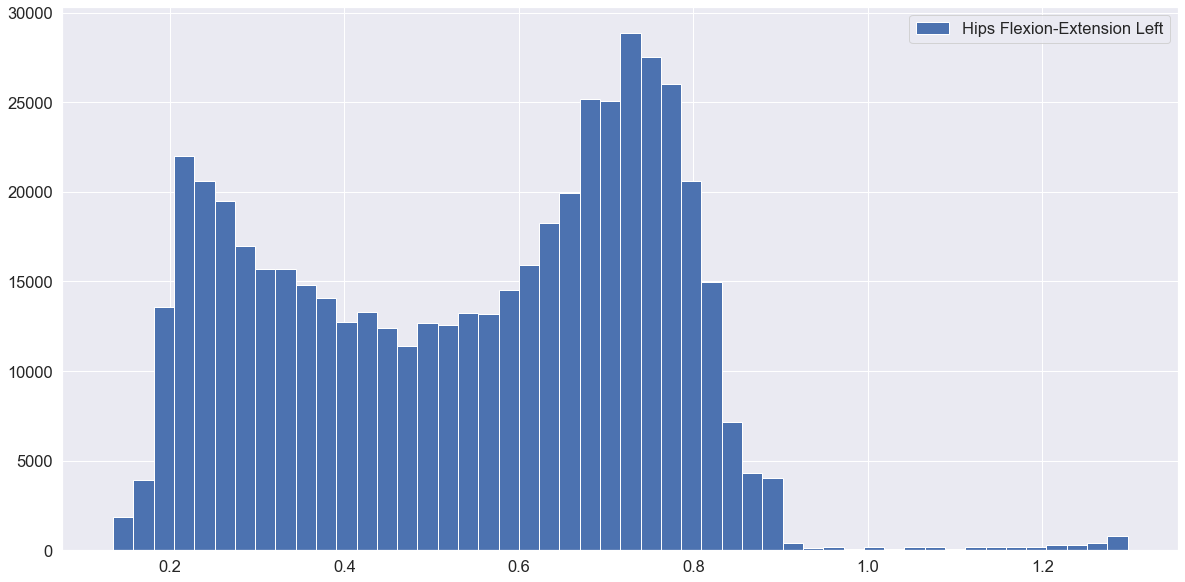

In [156]:
# Plot histogram of the data 
for f in range(len(features)):
    plt.hist(hModel_X_test_norm[:,:,f].reshape(-1,1), bins=50, label = features[f])
    plt.legend()
    plt.show()

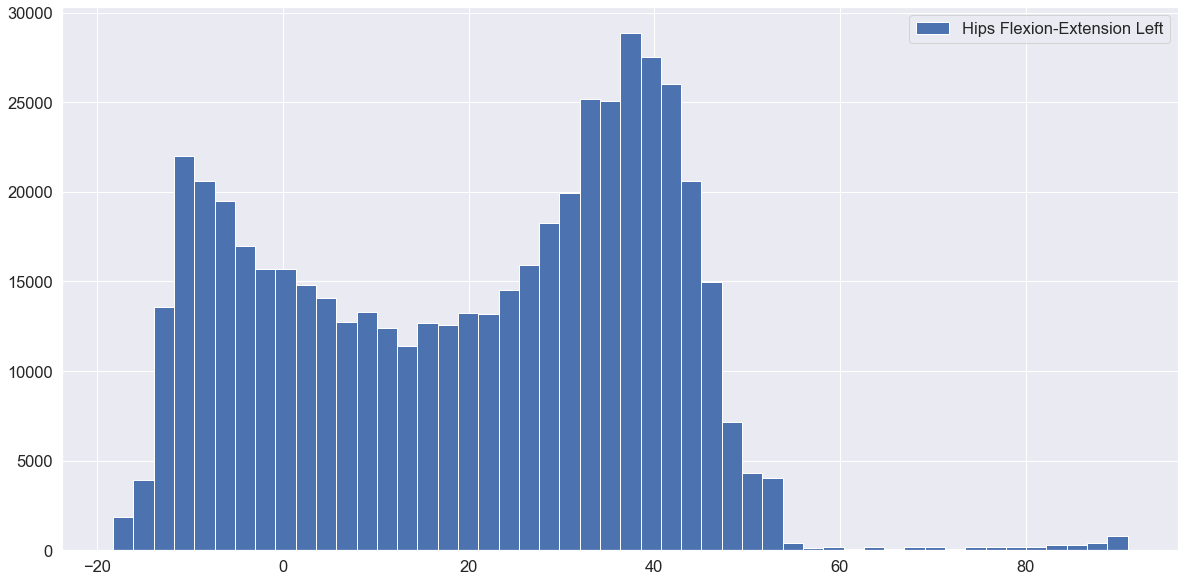

In [157]:
# Plot histogram of the data 
for f in range(len(features)):
    plt.hist(X_test_data[:,:,f].reshape(-1,1), bins=50, label = features[f])
    plt.legend()
    plt.show()

In [158]:
# Convert to Tensor 
# do not store on GPU (yet)
hModel_X_test_tensor = torch.from_numpy(hModel_X_test_norm).to(torch.float64)
hModel_Y_test_tensor = torch.from_numpy(hModel_Y_test_norm).to(torch.float64)

print(f'hModel_X_test_tensor shape: {hModel_X_test_tensor.shape}')
print(f'hModel_Y_test_tensor shape: {hModel_Y_test_tensor.shape}')


hModel_X_test_tensor shape: torch.Size([5169, 100, 1])
hModel_Y_test_tensor shape: torch.Size([5169, 1, 1])


In [159]:
# #only use if predicting one feature
# hModel_Y_test_tensor = hModel_Y_test_tensor[:,:,1].unsqueeze(-1)

# print(f'hModel_Y_test_tensor shape: {hModel_Y_test_tensor.shape}')

In [160]:
hModel_test_dataset = gaitDataset(hModel_X_test_tensor, hModel_Y_test_tensor)
# train_dataloader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle = False)
hModel_test_dataloader = DataLoader(hModel_test_dataset, batch_size=32, shuffle = False)
# hModel_test_dataloader = DataLoader(hModel_test_dataset, batch_size=16, shuffle = False)

#### Load Healthy Model

In [217]:
H_MODEL_PATH = r'D:\Study 2 Results and Models\Study 2 Model Checkpoints' +  '\\' + 'Exp205-2022-08-18-LSTM-In100-Out1' + '.pt'

In [218]:
#set parameters of the model 
input_size=len(features)
hidden_size=4
num_layers=1
in_seq_len=input_window
out_seq_len=output_window
output_size=len(features)
learning_rate= 0.001


hModel = LSTM(input_size =input_size, 
                hidden_size=hidden_size, 
                num_layers=num_layers, 
                in_seq_len=in_seq_len, 
                out_seq_len=out_seq_len, 
                output_size=output_size, 
                device=DEVICE
                ).to(DEVICE).double()
                
# hModel = MLP(input_size=input_size, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, device=DEVICE).to(DEVICE)
# hModel = CNN(input_size, output_size=output_size, in_seq_len=in_seq_len, out_seq_len=out_seq_len,  device = DEVICE).to(DEVICE)

optimiser = torch.optim.Adam(hModel.parameters(), lr = learning_rate)

checkpoint = torch.load(H_MODEL_PATH)
hModel.load_state_dict(checkpoint['model_state_dict'])
optimiser.load_state_dict(checkpoint['optimiser_state_dict'])
best_epoch_hModel = checkpoint['epoch']
best_val_loss_hModel = checkpoint['loss']

hModel.eval()

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc1): Linear(in_features=4, out_features=1, bias=True)
)

In [219]:
H_MODEL_PATH

'D:\\Study 2 Results and Models\\Study 2 Model Checkpoints\\Exp205-2022-08-18-LSTM-In100-Out1.pt'

In [220]:
best_epoch_hModel

22

In [221]:
best_val_loss_hModel

4.0660346206287715e-06

In [222]:
hModel_preds_norm, hModel_actual_norm, hmodel_loss = test_LSTM(hModel, hModel_test_dataloader, DEVICE)
# hModel_preds_norm, hModel_actual_norm, hmodel_loss = test_CNN(hModel, hModel_test_dataloader)

# hModel_preds_norm, hModel_actual_norm, hmodel_loss = test_MLP(hModel, hModel_test_dataloader)


# H_model_predicted_values = hModel_preds_norm.cpu().numpy()
# H_model_actual_values = hModel_actual_norm.cpu().numpy()

print(f'hmodel loss: {hmodel_loss}')
print(f'Shape of predicted values test: {hModel_preds_norm.cpu().numpy().shape}')
print(f'shape of actual values test: {hModel_actual_norm.cpu().numpy().shape}')

# hModel_preds = denormalise(hModel_preds_norm.cpu().numpy(), healthy_scalars)
hModel_preds = denormalise(hModel_preds_norm.cpu().numpy(), scalars) #UNCOMMENT FOR PREDS shape (batch_size, num_features)
hModel_actual = denormalise(hModel_actual_norm.cpu().numpy(), scalars)


print(f'Shape of predicted values test post denormalisation: {hModel_preds.shape}')
print(f'shape of actual values test post denormalisation: {hModel_actual.shape}')

0it [00:00, ?it/s]

hmodel loss: 4.062474458986228e-06
Shape of predicted values test: (5169, 1, 1)
shape of actual values test: (5169, 1, 1)
Shape of predicted values test post denormalisation: (5169, 1, 1)
shape of actual values test post denormalisation: (5169, 1, 1)


In [223]:
hModel_mse_loss, hModel_mse_std = mse_loss(hModel_preds, hModel_actual, reduction='mean', format='np')
hModel_mae_loss, hModel_mae_std = mae_loss(hModel_preds, hModel_actual, reduction='mean', format='np')

print('Losses for Healthy trained model')
print(f'hmodel MSE Loss: {hModel_mse_loss}')
print(f'hmodel MSE std: {hModel_mse_std}')
print(f'hmodel MAE Loss: {hModel_mae_loss}')
print(f'hmodel MAE std: {hModel_mae_std}')

Losses for Healthy trained model
hmodel MSE Loss: 0.035947138807902276
hmodel MSE std: 0.21069501340389252
hmodel MAE Loss: 0.11693327540838411
hmodel MAE std: 0.14924393594264984


#### Load CP Data for CP Model

In [224]:
# file_dir = r'D:\Study 2 Data\CP Gait\Val'
# cp_files = os.listdir(file_dir) 

# # Changes the working directory to get the data from their location 
# os.chdir(file_dir)
# cwd = os.getcwd()

# print(f'Current working directory is: {cwd}')
# print(f"There are {len(cp_files)} files in the specified path.")

# cp_files


In [225]:
# CP_data = create_dataframe(cp_files, all_features)

In [226]:
# CP_data.shape

In [171]:
# CP_samples = count_nsamples(CP_data)

In [172]:
# def pd_to_np_converter(data, n_samples, features):
#     #create a numpy array that stores the data for export
#     sample_ID = []
#     # patients = 2
#     # n_trials = 10
#     # # samples = patients * n_trials
#     data_store = np.zeros((n_samples, 2500, len(features)), dtype=np.float32)
#     i = 0

#     for p in data['Patient ID'].unique(): #loop over patients 
#         for t in data['Trial'].unique(): #loop over trials starting with trials 1 to trial 9 (inclusive)
#             pd_array = data[(data['Patient ID'] == p) & (data['Trial'] == t)]
#             if pd_array.empty:
#                 continue
#                 # print('DataFrame is empty!')
#                 # print(f'Trail {t} does not exist in {p}')
#             else:
#                 np_array = pd_array.to_numpy()
#                 data_store[i, :np_array.shape[0], :] = np_array[:,3:] 
#                 sample_ID.append(p+ ' Ts'+str(t)) 
#                 i +=1

#     return pd_array.columns, data_store

In [173]:
# CP_columns, CP_data_np = pd_to_np_converter(CP_data, CP_samples, features)

# print(f'CP_data_np.shape: {CP_data_np.shape}')


In [ ]:
# # CHECKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
# # Selecting the features to be used when creating windows 
# approx_seq_len = 2500 # appoximate the length of the longest sequence that can be encountered 
# # samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
# samples_per_file = 2000


# # create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
# X_CP_windows = np.zeros((samples_per_file*CP_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
# Y_CP_windows = np.zeros((samples_per_file*CP_samples, output_window, len(features)), dtype=np.float32) 


# start_idx = 0 #setting start index to equal zero 
# CP_sample_sum = 0
# CP_excluded_samples = []
# # Create training windows 

# #for i in tqdm(range(train_size)): #Use for including all data including outliers 
# for i in range(CP_samples): 
       
#     X_values, Y_values = window_generator(
#         CP_data_np[i,:,:],
#         input_window=input_window, 
#         output_window=output_window, 
#         stride=stride, 
#         features=features,
#         labels=labels
#         )

#     end_idx = start_idx + X_values.shape[0]

#     # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

#     X_CP_windows[start_idx:end_idx, :, :] = X_values
#     Y_CP_windows[start_idx:end_idx, :, :] = Y_values

#     # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

#     start_idx = end_idx 
#     CP_sample_sum += X_values.shape[0]

#     # except Exception:
#     #     exception_msg(i)
#     #     train_excluded_samples.append(i)

# # print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
# X_CP_data = X_CP_windows[:end_idx, :, :]
# Y_CP_data = Y_CP_windows[:end_idx, :, :]


# print(f'shape of X_CP_windows: {X_CP_windows.shape}')
# print(f'shape of Y_CP_windows: {Y_CP_windows.shape}')

# print(f'shape of X_CP_data: {X_CP_data.shape}')
# print(f'shape of Y_CP_data: {Y_CP_data.shape}')

In [ ]:
cpModel_X_test_norm = normalise_transform(X_test_data, cp_scalars)
cpModel_Y_test_norm = normalise_transform(Y_test_data, cp_scalars)

In [ ]:
# Plot histogram of the data 
for f in range(len(features)):
    plt.hist(cpModel_X_test_norm[:,:,f].reshape(-1,1), bins=50, label = features[f])
    plt.legend()
    plt.show()

In [ ]:
# Convert to Tensor 
# do not store on GPU (yet)
cpModel_X_test_tensor = torch.from_numpy(cpModel_X_test_norm).float()
cpModel_Y_test_tensor = torch.from_numpy(cpModel_Y_test_norm).float()

print(f'cpModel_X_test_tensor shape: {cpModel_X_test_tensor.shape}')
print(f'cpModel_Y_test_tensor shape: {cpModel_Y_test_tensor.shape}')


In [ ]:
cpModel_test_dataset = gaitDataset(cpModel_X_test_tensor, cpModel_Y_test_tensor)
# train_dataloader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle = False)
cpModel_test_dataloader = DataLoader(cpModel_test_dataset, batch_size=32, shuffle = False)

#### Load CP Model

In [ ]:
CP_MODEL_PATH = r'D:\Study 2 Results and Models\Study 2 Optimisation\2022-06-30 Optimisation LSTM CP 1'+  '\\' + 'LSTM CP-2022-07-01-trial6' + '.pt'

In [ ]:
#set parameters of the model 
input_size=len(features)
hidden_size=100
num_layers=4
in_seq_len=input_window
out_seq_len=output_window
output_size=len(features)
learning_rate= 0.001


cpModel = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, device=DEVICE).to(DEVICE)
optimiser = torch.optim.Adam(cpModel.parameters(), lr = learning_rate)

checkpoint = torch.load(CP_MODEL_PATH)
cpModel.load_state_dict(checkpoint['model_state_dict'])
optimiser.load_state_dict(checkpoint['optimiser_state_dict'])
best_epoch_cpModel = checkpoint['epoch']
best_val_loss_cpModel = checkpoint['loss']

cpModel.eval()

In [ ]:
CP_MODEL_PATH

In [ ]:
best_epoch_cpModel

In [ ]:
best_val_loss_cpModel

In [ ]:
cpModel_preds_norm, cpModel_actual_norm, cpModel_loss = test_LSTM(cpModel, cpModel_test_dataloader, DEVICE)

# H_model_predicted_values_CP = hModel_preds_norm_CP.cpu().numpy()
# H_model_actual_values_CP = hModel_actual_norm_CP.cpu().numpy()

print(f'cpModel loss: {cpModel_loss}')
print(f'Shape of predicted values test: {cpModel_preds_norm.cpu().numpy().shape}')
print(f'shape of actual values test: {cpModel_actual_norm.cpu().numpy().shape}')

cpModel_preds = denormalise(cpModel_preds_norm.cpu().numpy(), cp_scalars)
cpModel_actual = denormalise(cpModel_actual_norm.cpu().numpy(), cp_scalars)

print(f'Shape of predicted values test post denormalisation: {cpModel_preds.shape}')
print(f'shape of actual values test post denormalisation: {cpModel_actual.shape}')

In [ ]:
cpModel_mse_loss, cpModel_mse_std = mse_loss(cpModel_preds, cpModel_actual, reduction='mean', format='np')
cpModel_mae_loss, cpModel_mae_std = mae_loss(cpModel_preds, cpModel_actual, reduction='mean', format='np')

print('Losses for CP trained model')
print(f'cpModel MSE Loss: {cpModel_mse_loss}')
print(f'hmodel MSE std: {cpModel_mse_std}')
print(f'hmodel MAE Loss: {cpModel_mae_loss}')
print(f'hmodel MAE std: {cpModel_mae_std}')

### Compare Predictions of Healthy trained and CP model

In [ ]:
from matplotlib import rcParams

In [ ]:
s_num = 1 #sample number 
f = 2 #feature

sns.set_theme(style='white')


samples = [10300]
f_values = [0,1,2,3,4,5]
for s_num in samples:
    for f in f_values:
        
        # X_CP_norm = normalise_transform(X_CP_data, cp_scalars)
        # Y_CP_norm = normalise_transform(Y_CP_data, cp_scalars)

        input = X_CP_data[s_num,:,f]

        # print(f'input length: {len(input)}')
        input_bf_processing = Y_CP_data[s_num,:,f]
        actual = cpModel_actual_CP[s_num,:,f]
        CP_model_preds = cpModel_preds_CP[s_num,:,f]
        H_model_preds = hModel_preds_CP[s_num,:,f]

        past_timepoints = np.arange(0,len(input))
        # print(f'past_timepoints: {past_timepoints}')

        future_timepoints = np.arange(len(input), len(input)+len(CP_model_preds))
        # print(f'future_timepoints: {future_timepoints}')

        rcParams['figure.figsize'] = 20,6

        # ax = sns.lineplot(x=past_timepoints[-20:], y=input[-20:]) #only plots last 20 values of input
        ax = sns.lineplot(x=past_timepoints[:], y=input[:])

        # ax.fill_between(x=past_timepoints, y1=input_stats, y2=input_stats, alpha=0.1)
        ax = sns.lineplot(x=future_timepoints, y=CP_model_preds, label='CP_model_preds')
        ax = sns.lineplot(x=future_timepoints, y=H_model_preds, label='H_model_preds')
        ax = sns.lineplot(x=future_timepoints, y=actual, label='actual')
        # ax = sns.lineplot(x=future_timepoints, y=input_bf_processing, label='input_bf_processing')

        # ax.set(font_scale = 1)
        # sns.set(rc={'axes.facecolor':'whitegrid', 'figure.facecolor':'whitegrid'})
 
        fontsize = 15
        ax.set_xlabel('Time-step', fontsize =15)
        ax.set_ylabel('Angle (degrees)', fontsize =15)
        ax.set_title(f'Sample {s_num} - Feature {f} - {labels_keys[f]}', fontsize=fontsize)
        plt.legend(fontsize = 15)
        plt.figure()


In [ ]:
diff = cpModel_preds_CP - hModel_preds_CP

# rcParams['figure.figsize'] = 20,6
p = sns.displot(diff[:,:,2], height=4, aspect=2)
p.fig.set_dpi(100)


### Model

In [ ]:
mae_timesteps = []
for s in range(output_window):
    # print(s)
    _ = mae_loss(np.expand_dims(predicted_CP_denorm[:,s,:],-1), np.expand_dims(actual_CP_denorm[:,s,:],-1), reduction='mean', format='np')
    mae_timesteps.append(_)

    print(f'MAE loss and standard deviation for timestep {s+1} is: {mae_timesteps[s]}')

actual_CP_denorm[:,:,:].shape

#### Use for output window > 1

In [ ]:
# #Only use when output window is greater than 1
# s = 00#sample to plot
# nsteps_future = 300 #number of steps to predict in the future 

# with torch.no_grad(): #do not calculate gradients for forward pass
#     in_to_model = hModel_X_test_tensor[s].expand((1,-1,-1)).to(DEVICE) 
#     all_preds=[] 

#     for _ in range(0,nsteps_future): #loop over the steps to predict in the future
#         # print(f'in_to_model: {in_to_model[:,-10:,1]}')
#         # print(f'shape in to model: {in_to_model.shape}')
#         future_pred = hModel(in_to_model)
#         # print(f'future pred: {future_pred.shape}')
#         # print(f'shape future preds: {future_pred[:,0,:].unsqueeze(1).shape}')

#         all_preds.append(future_pred[:,0,:].unsqueeze(1).tolist())

#         new_in_to_model = torch.cat((in_to_model, future_pred[:,0,:].unsqueeze(1)),1)
#         in_to_model = new_in_to_model[:,1:,:]
#         # print(f'shape in to model: {in_to_model.shape}')

# all_future_preds = np.array(all_preds).reshape((nsteps_future,len(features)))

# all_future_preds.shape

In [ ]:
# #only use for multiple timesteps
# input_seq = hModel_X_test_tensor[s].expand((1,-1,-1))


# for f in range(len(features)):
#     path = r'D:\Study 2 Results and Models\Model Performance' + '\\'  + 'Exp' + str(exp_ID) + '-' + str(date.today()) + '-' + model + '-In' + str(input_window) + '-Out' + str(output_window) + '-Plot(1)-' + str(features[f]) + '.png'
   
#     input = input_seq[:,:,f].squeeze()
#     print(input.shape)

#     predicted_trajectory = all_future_preds[:,f]
#     print(predicted_trajectory.shape)

#     past_timepoints = np.arange(0,len(input))
#     # print(f'past_timepoints: {past_timepoints}')

#     future_timepoints = np.arange(len(input), len(input)+len(predicted_trajectory))
#     # print(f'future_timepoints: {future_timepoints}')

#     actual_seq = hModel_Y_test_tensor[s:s+nsteps_future,0,f].reshape(-1,1).squeeze()
#     actual_timepoints = np.arange(len(input), len(input)+len(actual_seq))

#     rcParams['figure.figsize'] = 20,6

#     # ax = sns.lineplot(x=past_timepoints[-20:], y=input[-20:]) #only plots last 20 values of input
#     ax = sns.lineplot(x=past_timepoints[:], y=input[:], label='input_timesteps')

#     # ax.fill_between(x=past_timepoints, y1=input_stats, y2=input_stats, alpha=0.1)
#     ax = sns.lineplot(x=future_timepoints, y=predicted_trajectory, label='hModel_preds')

#     ax = sns.lineplot(x=actual_timepoints, y = actual_seq, label='actual')
#     # ax = sns.lineplot(x=future_timepoints, y=H_model_preds, label='H_model_preds')
#     # ax = sns.lineplot(x=future_timepoints, y=actual, label='actual')
#     # ax = sns.lineplot(x=future_timepoints, y=input_bf_processing, label='input_bf_processing')

#     # ax.set(font_scale = 1)
#     # sns.set(rc={'axes.facecolor':'whitegrid', 'figure.facecolor':'whitegrid'})

#     fontsize = 15
#     ax.set_xlabel('Time-step', fontsize =15)
#     ax.set_ylabel('Angle (degrees)', fontsize =15)

#     plt.legend(fontsize = 15)
  
#     # plt.savefig(path)
#     plt.show()


#### Predicting Future loss for 200 timesteps in advance for entire validation set

In [71]:
val_inputs=X_val_lt.double()
val_targets=Y_val_lt.double()

print(f'val_inputs.shape: {val_inputs.shape}')
print(f'val_targets.shape: {val_targets.shape}')


val_inputs.shape: torch.Size([3179, 100, 1])
val_targets.shape: torch.Size([3179, 200, 1])


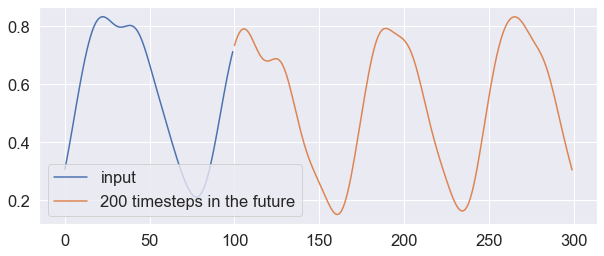

In [72]:
#checking the windows
x1 = np.arange(0,100)
x2 = np.arange(100,300)
x3 = 100
plt.plot(x1, val_inputs[10,:,0].cpu(), label='input')
plt.plot(x2, val_targets[10,:,0].cpu(), label='200 timesteps in the future')
# plt.scatter(x3, Y_val_data[10,0,0], s=30, label='target value')
plt.legend()


In [73]:
type(val_inputs)

torch.Tensor

In [117]:
lt_loss_criterion = nn.MSELoss() #long term loss criterion (l1 loss measures MAE for 99 steps in the future)
future_window=200
runningLoss_val_lt = 0.

with torch.no_grad(): # makes sure gradient is not stored 
    
    val_inputs_, val_targets_ = val_inputs.to(DEVICE), val_targets.to(DEVICE)
    
    future_preds = torch.zeros((val_inputs_.shape[0], 200, len(features))).to(DEVICE) #would store the predicted outputs for 200 timesteps
    
    # loop to calculate all 200 preds in the future
    for t in range(0,future_window):
        # optimiser.zero_grad()
        # print(f'val.inputs.shape: {val_inputs_.shape} at time {t}')
        preds = model_LSTM(val_inputs_)
        # print(f'preds.shape: {preds.shape} at time {t}')
        # print(f'future_preds[:,t,:].shape: {future_preds[:,t,:].shape}')
        future_preds[:,t,:] = preds.reshape(-1,1)
        # print(f'future_preds[:,t,:].shape: {future_preds[:,t,:].shape} at time {t}')
        new_val_inputs = torch.cat((val_inputs_, preds),1)
        # print(f'new_val_inputs.shape: {new_val_inputs.shape} at time {t}')
        val_inputs_ = new_val_inputs[:,1:,:]
        
    
    # Evalute long term predictions
    print(f'future_preds[101:].shape: {future_preds[:,101:,:].shape}')
    # future_preds[:,:,:] = 0.5
    loss = lt_loss_criterion(future_preds[:,101:,:], val_targets_[:,101:,:])
    # loss = lt_loss_criterion(val_targets_[:,101:,:] ,val_targets_[:,101:,:])

    runningLoss_val_lt += loss.item()
    print(runningLoss_val_lt)

future_preds[101:].shape: torch.Size([3179, 99, 1])
0.09460246369595049


In [109]:
a = torch.mean((val_targets_[:,101:,:] - future_preds[:,101:,:] ) ** 2 )
a


tensor(0.1202, device='cuda:0', dtype=torch.float64)

In [110]:
a = (val_targets_[:,101:,:] - future_preds[:,101:,:]) ** 2
a.reshape(-1,1)
a.mean()

tensor(0.1202, device='cuda:0', dtype=torch.float64)

In [111]:
# future_preds[:,101:,:]

In [112]:
val_inputs_np = val_inputs.cpu().detach().numpy()
val_targets_np = val_targets.cpu().detach().numpy()
future_preds_np = future_preds.cpu().detach().numpy()

In [113]:
# Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))
from scipy.stats import pearsonr

all_corr = np.zeros(6)
for f in range(len(features)):
    corr, _ = pearsonr(val_targets_np[:,100:,f].reshape(-1,1).squeeze(), future_preds_np[:,100:,f].reshape(-1,1).squeeze())
    print(f'correlation for feature {features[f]} is {round(corr,2)}')
    all_corr[f] = corr

all_corr.mean()
    



correlation for feature Hips Flexion-Extension Left is -0.08


-0.013428140588552297

In [114]:
def count_parameters(model): 
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [115]:
count_parameters(model_LSTM)

117

(100,)
(200,)


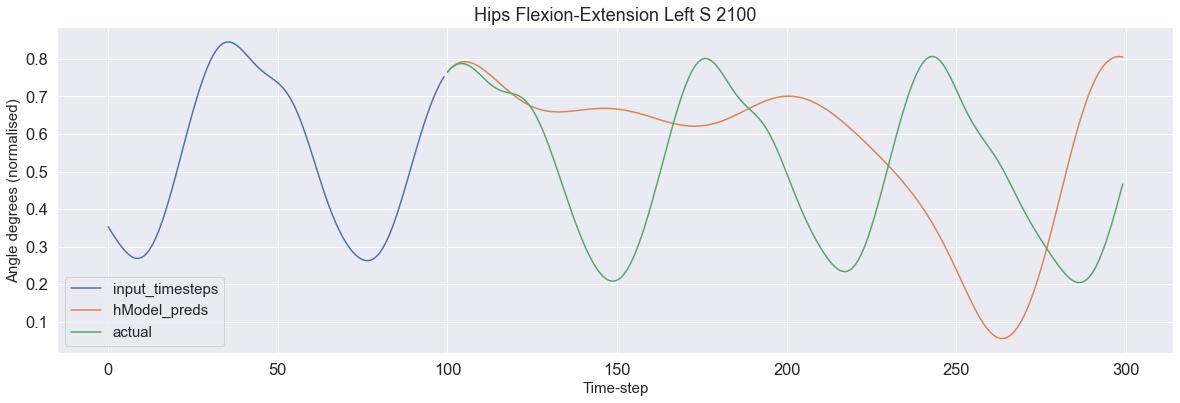

In [116]:
val_inputs_np = val_inputs.cpu().detach().numpy()
val_targets_np = val_targets.cpu().detach().numpy()
future_preds_np = future_preds.cpu().detach().numpy()

s=2100
for f in range(len(features)):
    path = r'D:\Study 2 Results and Models\Model Performance' + '\\'  + 'Exp' + str(exp_ID) + '-' + str(date.today()) + '-' + model + '-In' + str(input_window) + '-Out' + str(output_window) + '-Plot(1)-' + str(features[f]) + '.png'
   
    input = val_inputs_np[s,:,f].squeeze()
    print(input.shape)

    predicted_trajectory = future_preds_np[s,:,f].squeeze()
    print(predicted_trajectory.shape)

    past_timepoints = np.arange(0,len(input))
    # print(f'past_timepoints: {past_timepoints}')

    future_timepoints = np.arange(len(input), len(input)+len(predicted_trajectory))
    # print(f'future_timepoints: {future_timepoints}')

    actual_seq = val_targets_np[s,:,f].squeeze()
    actual_timepoints = np.arange(len(input), len(input)+len(actual_seq))

    rcParams['figure.figsize'] = 20,6

    # ax = sns.lineplot(x=past_timepoints[-20:], y=input[-20:]) #only plots last 20 values of input
    ax = sns.lineplot(x=past_timepoints[:], y=input[:], label='input_timesteps')

    # ax.fill_between(x=past_timepoints, y1=input_stats, y2=input_stats, alpha=0.1)
    ax = sns.lineplot(x=future_timepoints, y=predicted_trajectory, label='hModel_preds')

    ax = sns.lineplot(x=actual_timepoints, y = actual_seq, label='actual')
    # ax = sns.lineplot(x=future_timepoints, y=H_model_preds, label='H_model_preds')
    # ax = sns.lineplot(x=future_timepoints, y=actual, label='actual')
    # ax = sns.lineplot(x=future_timepoints, y=input_bf_processing, label='input_bf_processing')

    # ax.set(font_scale = 1)
    # sns.set(rc={'axes.facecolor':'whitegrid', 'figure.facecolor':'whitegrid'})

    fontsize = 15
    ax.set_xlabel('Time-step', fontsize =15)
    ax.set_ylabel('Angle degrees (normalised)', fontsize =15)

    plt.legend(fontsize = 15)
    plt.title(features[f] + ' S ' + str(s))
 
    plt.savefig(path)
    plt.show()


#### Predicting and Plotting loss for 1 sample in the validation set

In [ ]:
s = 100#sample to plot
nsteps_future = 500 #number of steps to predict in the future 

with torch.no_grad(): #do not calculate gradients for forward pass
    in_to_model = hModel_X_test_tensor[s].expand((1,-1,-1)).to(DEVICE) 
    all_preds=[] 

    for _ in range(0,nsteps_future): #loop over the steps to predict in the future
        # # print(f'in_to_model: {in_to_model[:,-10:,1]}')
        # future_pred = hModel(in_to_model)

        # all_preds.append(future_pred.tolist())

        # new_in_to_model = torch.cat((in_to_model, future_pred),1)
        # in_to_model = new_in_to_model[:,1:,:]

        #Uncomment only for CNN
        future_pred = hModel(in_to_model.permute(0,2,1))

        all_preds.append(future_pred.permute(0,2,1).tolist())

        new_in_to_model = torch.cat((in_to_model, future_pred.permute(0,2,1)),1)
        in_to_model = new_in_to_model[:,1:,:]

all_future_preds = np.array(all_preds).reshape((nsteps_future,len(features)))

all_future_preds.shape 

In [ ]:
input_seq = hModel_X_test_tensor[s].expand((1,-1,-1))


for f in range(len(features)):
    path = r'D:\Study 2 Results and Models\Model Performance' + '\\'  + 'Exp' + str(exp_ID) + '-' + str(date.today()) + '-' + model + '-In' + str(input_window) + '-Out' + str(output_window) + '-Plot(1)-' + str(features[f]) + '.png'
   
    input = input_seq[:,:,f].squeeze()
    print(input.shape)

    predicted_trajectory = all_future_preds[:,f]
    print(predicted_trajectory.shape)

    past_timepoints = np.arange(0,len(input))
    # print(f'past_timepoints: {past_timepoints}')

    future_timepoints = np.arange(len(input), len(input)+len(predicted_trajectory))
    # print(f'future_timepoints: {future_timepoints}')

    actual_seq = hModel_Y_test_tensor[s:s+nsteps_future,:,f].reshape(-1,1).squeeze()
    actual_timepoints = np.arange(len(input), len(input)+len(actual_seq))

    rcParams['figure.figsize'] = 20,6

    # ax = sns.lineplot(x=past_timepoints[-20:], y=input[-20:]) #only plots last 20 values of input
    ax = sns.lineplot(x=past_timepoints[:], y=input[:], label='input_timesteps')

    # ax.fill_between(x=past_timepoints, y1=input_stats, y2=input_stats, alpha=0.1)
    ax = sns.lineplot(x=future_timepoints, y=predicted_trajectory, label='hModel_preds')

    ax = sns.lineplot(x=actual_timepoints, y = actual_seq, label='actual')
    # ax = sns.lineplot(x=future_timepoints, y=H_model_preds, label='H_model_preds')
    # ax = sns.lineplot(x=future_timepoints, y=actual, label='actual')
    # ax = sns.lineplot(x=future_timepoints, y=input_bf_processing, label='input_bf_processing')

    # ax.set(font_scale = 1)
    # sns.set(rc={'axes.facecolor':'whitegrid', 'figure.facecolor':'whitegrid'})

    fontsize = 15
    ax.set_xlabel('Time-step', fontsize =15)
    ax.set_ylabel('Angle (degrees)', fontsize =15)

    plt.legend(fontsize = 15)
    plt.title(features[f] + ' S ' + str(s))
 
    # plt.savefig(path)
    plt.show()


In [ ]:
#original sequence size [n_samples, timesteps, featuers]

#take only one timesteps from each sample + choose one feature only [:, 1, f]

#flatten sequence and plot 

in_seq_to_plt = X_sample.cpu().numpy()

gen_seq_to_plt = generated_sequence.cpu().numpy()

in_seq_to_plt_denorm = denormalise(in_seq_to_plt, scalars)
gen_seq_to_plt_denorm = denormalise(gen_seq_to_plt, scalars)

in_seq_to_plt_denorm = in_seq_to_plt_denorm[:, :, 1]
gen_seq_to_plt_denorm = gen_seq_to_plt_denorm[:, 0, 1]

print('in_seq_to_plt_denorm')
print(in_seq_to_plt_denorm)
print('gen_seq_to_plt_denorm')
print(gen_seq_to_plt_denorm)



In [ ]:
past_timepoints=np.array()

ax = sns.lineplot(x=past_timepoints[-20:], y=input[-20:])
# ax.fill_between(x=past_timepoints, y1=input_stats, y2=input_stats, alpha=0.1)
ax = sns.lineplot(x=future_timepoints, y=preds)
ax = sns.lineplot(x=future_timepoints, y=actual)

### Benchmark

#### Benchmark against naive method 

In [ ]:
## benchmark against naive output (making prediction only last value)
naive_1_train_output = np.zeros(Y_train_data.shape)

    
for f in range(len(features)):
    for s in range(Y_train_data.shape[0]):
        naive_1_train_output[s,:,f] = np.ones((output_window)) * X_train_data[s,-1,f]



# print(naive_1_test_output.shape)


# naive_1_test_output[1,:,1]

# X_test_data[1,:,1]



In [ ]:
naive_1_mse_loss, naive_1_mse_std = mse_loss(naive_1_train_output, Y_train_data, reduction='mean', format='np')
naive_1_mae_loss, naive_1_mae_std = mae_loss(naive_1_train_output, Y_train_data, reduction='mean', format='np')

print(f'naive_1 MSE Loss: {naive_1_mse_loss}')
print(f'naive_1 MSE std: {naive_1_mse_std} ')
print(f'naive_1 MAE Loss: {naive_1_mae_loss}')
print(f'naive_1 MAE std: {naive_1_mae_std}')

In [ ]:
## benchmark against mean output

naive_average_train_output = np.zeros(Y_train_data.shape)

for f in range(len(features)):
    for s in range(Y_train_data.shape[0]):
        naive_average_train_output[s,:,f] = np.ones((output_window)) * np.mean(X_train_data[s,:,f])



print(naive_average_train_output.shape)



In [ ]:
naive_average_mse_loss, naive_average_mse_std = mse_loss(naive_average_train_output, Y_train_data, reduction='mean', format='np')
naive_average_mae_loss, naive_average_mae_std = mae_loss(naive_average_train_output, Y_train_data, reduction='mean', format='np')

print(f'average MSE Loss: {naive_average_mse_loss}')
print(f'average MSE std: {naive_average_mse_std} ')
print(f'average MAE Loss: {naive_average_mae_loss}')
print(f'average MAE std: {naive_average_mae_std}')

### Save Progress and Results

In [ ]:
# model = 'LSTM'
# exp_ID = '022'

out_fname = r'D:\Study 2 Results and Models\Investigation Results' + '\\' + 'Study 2 Experimentation Results' + '.txt'
comments = 'LSTM'




In [ ]:
# if os.path.exists(out_fname):
#     print('ERROR: File with this name already exists, try alternative name.')
    
# else:
with open(out_fname, 'a+') as text_file:
    
    print('Experiment Report', file=text_file)
    print(f'{exp_ID}: {date.today()}',file=text_file)
    # print('\n', file=text_file)
    print(f'model: {model}', file=text_file)
    print(f'features: {features} \n', file=text_file)
    print(f'Comments: {comments} \n', file=text_file)

    print('Information on Data', file=text_file)
    print(f'train size: {train_sample_sum}', file=text_file)
    print(f'validation size: {val_sample_sum}', file=text_file)
    print(f'Train subjects: {train_subjects}', file=text_file)
    print(f'Val subjects: {val_subjects}', file=text_file)
    print(f'Scalars: {scalars} \n', file=text_file)

    print('Model Hyperparameters', file=text_file)
    print(f'input window size: {input_window}', file=text_file)
    print(f'output window size: {output_window}', file=text_file)
    print(f'stride: {stride}', file=text_file)
    # print(f'epochs: {num_epochs}', file=text_file)
    print(f'best epoch: {best_epoch}', file=text_file)
    print(f'hidden size: {hidden_size}', file=text_file)
    print(f'number of layers: {num_layers}', file=text_file)
    print(f'learning rate: {learning_rate}', file=text_file)
    print(f'optimiser: MSE', file=text_file)

    print('\n', file = text_file)
    print(f'Model Architecture', file=text_file)
    print(checkpoint_model, file=text_file)

    print(f'Losses during training:', file=text_file)
    print(f'training loss: {train_history}', file=text_file)
    print(f'validation history: {val_history}', file=text_file)
    print(f'lt loss: {lt_history}', file=text_file)
    print(f'r value: {r_history}', file=text_file)

    print('\n', file=text_file)
    print(f'Denomralised MSE and MAE: ', file=text_file)
    print(f'Validation MSE and std(degrees): {val_mse_loss:.3f}, {val_mse_std:.3f}', file=text_file)
    print(f'Validation MAE and std (degrees): {val_mae_loss:.3f}, {val_mae_std:.3f}', file=text_file)
    # print('\n', file=text_file)
    print('--------------------------------------------------------------------------------------------------------', file=text_file)


print("Generation of text file complete.")

In [ ]:
plt_path = r'D:\Study 2 Results and Models\Investigations Plots' + '\\'  + 'Exp' + str(exp_ID) + '-' + str(date.today()) + '-' + model + '-In' + str(input_window) + '-Out' + str(output_window) + '(loss)' + '.png'
fst_e = 1 #first epoch to start plotting for 
x = [i for i in range(fst_e,num_epochs)]
# print(x)
# print(train_history[20:145].shape)

plt.plot(np.log(train_history[fst_e:]), label = 'Training loss')
plt.plot(np.log(val_history[fst_e:]), label = 'Val loss')
plt.plot(np.log(lt_history[fst_e:]), label='Long term preds loss')
plt.plot(np.log(np.abs(r_history[fst_e:])), label='Val R values (absolute value)')
plt.axhline(np.min(np.log(lt_history)), label='mininum long term loss')
print(np.min(lt_history))
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Training and Validation MSE Loss')
plt.legend()

# plt.plot(x,train_history[fst_e:], label = 'Training loss')
# plt.plot(x,val_history[fst_e:], label = 'Val loss')
# plt.plot(train_history, label = 'Training loss')
# plt.plot(val_history, label = 'Val loss')


plt.savefig(plt_path)

In [ ]:
# plt_path = r'D:\Study 2 Results and Models\Investigations Plots' + '\\'  + 'Exp' + str(exp_ID) + '-' + str(date.today()) + '-' + model + '-In' + str(input_window) + '-Out' + str(output_window) + '(loss)' + '.png'
# fst_e = 10 #first epoch to start plotting for 
# x = [i for i in range(fst_e,num_epochs)]
# # print(x)
# # print(train_history[20:145].shape)
# plt.plot(x,train_history[fst_e:], label = 'Training loss')
# plt.plot(x,val_history[fst_e:], label = 'Val loss')
# # plt.plot(train_history, label = 'Training loss')
# # plt.plot(val_history, label = 'Val loss')


# plt.xlabel('Iterations')
# plt.ylabel('MSE Loss')
# plt.title('Train and Val MSE Loss')
# plt.legend()
# plt.savefig(plt_path)

In [ ]:
import_path = r'D:\Study 1 Results and Models\Study 1 Models\LSTM_4' + '\\' + 'Exp014-2022-02-10-LSTM-In120-Out3.pickle'
# # # import_path = r'C:\Users\Rania\rbk9\Study 1 Results and Models\Study 1 Models\CNN_1' + '\\' + 'Exp001-2022-01-24-CNN-In96-Out1.pickle'
# # # model_CNN = CNN(input_size, output_size=output_size, kernel_size=kernel_size, stride=1, in_seq_len=in_seq_len, out_seq_len=out_seq_len,  device = DEVICE).to(DEVICE)

input_size=len(features)
hidden_size=128
num_layers=4
in_seq_len=input_window
out_seq_len=output_window
output_size=len(features)
# num_epochs=60

# # learning_rate= 0.001

model_LSTM = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, device=DEVICE).to(DEVICE)
model_LSTM.load_state_dict(torch.load(import_path))
model_LSTM.eval()

In [ ]:
pred_val_output, actual_val_output, val_loss = test_LSTM(model_LSTM, val_dataloader, DEVICE)

predicted_values_val = pred_val_output.cpu().numpy()
actual_values_val = actual_val_output.cpu().numpy()

print(f'val loss: {val_loss}')
print(f'Shape of predicted values test: {predicted_values_val.shape}')
print(f'shape of actual values test: {actual_values_val.shape}')

predicted_val_denorm = denormalise(predicted_values_val, scalars)
actual_val_denorm = denormalise(actual_values_val, scalars)

print(f'Shape of predicted values test post denormalisation: {predicted_val_denorm.shape}')
print(f'shape of actual values test post denormalisation: {actual_val_denorm.shape}')

In [ ]:
val_mse_loss, val_mse_std = mse_loss(predicted_val_denorm, actual_val_denorm, reduction='mean', format='np')
val_mae_loss, val_mae_std = mae_loss(predicted_val_denorm, actual_val_denorm, reduction='mean', format='np')

print(f'Val MSE Loss: {val_mse_loss}')
print(f'Val MSE std: {val_mse_std}')
print(f'Val MAE Loss: {val_mae_loss}')
print(f'Val MAE std: {val_mae_std}')

In [ ]:
# for p in model_LSTM.parameters():
#     print(p.device)

In [ ]:
# # Testing function 
# def test_LSTM(model, dataloader):
#     loss_function = nn.MSELoss(reduction='mean')
#     model.eval()
#     actual_output, pred_output = [], []
#     running_loss = 0. 
    
#     with torch.no_grad():
#         for idx, (batch_inputs, batch_targets) in tqdm(enumerate(dataloader)):

#             batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)

#             # if idx==0:
#             #     batch_preds = model(batch_inputs)
#             #     # print(f'batch shape: {batch_preds.shape}')
#             #     loss = loss_function(batch_preds, batch_targets)
#             #     running_loss += loss.item()
#             #     current_preds = batch_preds
#             #     all_preds = batch_preds

#             # else:
#             #     batch_preds = model(batch_inputs)
#             #     print(f'batch shape: {batch_preds.shape}')
#             #     loss = loss_function(batch_preds, batch_targets)
#             #     running_loss += loss.item()
#             #     all_preds = torch.cat((current_preds, batch_preds), dim=0)
#             #     current_preds = batch_preds

#             batch_preds = model(batch_inputs)
#             # print(f'batch preds: {batch_preds.type}')
#             loss = loss_function(batch_preds, batch_targets)
#             running_loss += loss.item()
#             actual_output.append(batch_targets)
#             pred_output.append(batch_preds)


#             #             lst = []
#             # print(f'{x.size()}')
#             # for i in range(10):
#             #     x += i  # say we do something with x at iteration i
#             #     lst.append(x)
#             # # lstt = torch.stack([x for _ in range(10)])
#             # lstt = torch.stack(lst)
#             # print(lstt.size())

#         total_loss = running_loss / len(dataloader)

#         actual_output_tensor = torch.vstack(actual_output)
#         pred_output_tensor = torch.vstack(pred_output)
    
#     return pred_output_tensor, actual_output_tensor, total_loss

In [ ]:
# # Creates dataset object that gets individual samples for training/testing so that the Dataloader can generate batches
# class gaitDataset(Dataset):
#     def __init__(self, x, y):
#         self.x = x 
#         self.y = y 

#     def __len__(self):
#         return self.x.shape[0]
    
#     def __getitem__(self, index):
#         X_sample = self.x[index, :, :]
#         Y_sample = self.y[index, :, :]
#         return X_sample, Y_sample

In [ ]:
# # X_test_norm = normalise_transform(X_test_data, scalars)
# # Y_test_norm = normalise_transform(Y_test_data, scalars)

# # Convert to Tensor 
# # do not store on GPU (yet)
# X_test = torch.from_numpy(X_train_norm).float()
# Y_test = torch.from_numpy(Y_train_norm).float()

# print(f'X_test shape: {X_test.shape}')
# print(f'Y_test shape: {Y_test.shape}')

In [ ]:
# test_dataset = gaitDataset(X_test, Y_test)
# # # test_dataloader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)
# test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False) #ADJUSTED

# print(f"Test Dataset length: {len(test_dataset)}")

In [ ]:
# pred_test_output, actual_test_output, test_loss = test_LSTM(model_LSTM, test_dataloader)

# predicted_values_test = pred_test_output.cpu().numpy() # premute again to make the order of the array (samples, windows, features)
# actual_values_test =  actual_test_output.cpu().numpy()

# print(f'test loss: {test_loss}')

# print(f'Shape of predicted values test: {predicted_values_test.shape}')
# print(f'shape of actual values test: {actual_values_test.shape}')

# predicted_test_denorm = denormalise(predicted_values_test, scalars)
# actual_test_denorm =  denormalise(actual_values_test, scalars)

# print(f'Shape of predicted values test post denormalisation: {predicted_test_denorm.shape}')
# print(f'shape of actual values test post denormalisation: {actual_test_denorm.shape}')

In [ ]:
test_mse_loss, test_mse_std = mse_loss(predicted_test_denorm, actual_test_denorm, reduction='mean', format='np')
test_mae_loss, test_mae_std = mae_loss(predicted_test_denorm, actual_test_denorm, reduction='mean', format='np')

print(f'Test MSE Loss: {test_mse_loss}')
print(f'Test MSE std: {test_mse_std} ')

# MDE= mae_loss(actual_test_denorm[:-1,:,:],actual_test_denorm[1:,:,:],reduction='mean', format='np')
MDE= mae_loss(actual_test_denorm[:,:,:],actual_test_denorm[:,:,:],reduction='mean', format='np')

print(f'Test MAE Loss: {test_mae_loss}')
print(f'Test MAE std: {test_mae_std}')

In [ ]:
plt.hist(np.abs(predicted_test_denorm[:,:,1].reshape(-1,1) - actual_test_denorm[:,:,1].reshape(-1,1)))



In [ ]:
actual = np.array([23,36,28,33,44,22,12,10,1])
predicted = np.array([23, 35.5, 28.1, 33, 45, 15, 13, 8, 0])

actual-predicted

In [ ]:
abs_values = np.abs(actual-predicted)

plt.hist(abs_values)

In [ ]:


np.abs(actual-predicted).std()
